# LIBRARIES

In [3]:
!pip install tweet-preprocessor

In [1]:
!pip install palettable

     ---------------------------------------- 0.0/332.3 kB ? eta -:--:--
     -------- ------------------------------ 71.7/332.3 kB 2.0 MB/s eta 0:00:01
     ----------------------------- -------- 256.0/332.3 kB 3.2 MB/s eta 0:00:01
     -------------------------------------- 332.3/332.3 kB 3.0 MB/s eta 0:00:00


In [5]:
!pip install textblob

  Using cached textblob-0.17.1-py2.py3-none-any.whl (636 kB)


In [58]:
import preprocessor as p
import plotly.express as px
import tweepy
import csv
import pandas as pd
import numpy as np
from plotly import graph_objs as go
import datetime
import seaborn as sns
import nltk
import re
import string
from textblob import TextBlob
import matplotlib.pyplot as plt
from keras.models import Sequential
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from collections import Counter
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.sentiment.util import *
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import BernoulliNB
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.feature_extraction.text import TfidfVectorizer

In [1]:
from pyspark.sql.types import StructType, StructField, StringType, IntegerType
from pyspark.sql.functions import col, count, length,split, explode, desc,lower
from pyspark.sql import functions as F
from mrjob.job import MRJob  
import subprocess
import mysql.connector
from mysql.connector import connect, Error

In [ ]:
# Download Required NLTK Files.
nltk.download('vader_lexicon')
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('omw-1.4')

------------------

**Section A. Hadoop Process**

------------

In [2]:
# 1. Create Session
sparkSession = SparkSession.builder.appName("Assesment 2").config("spark.driver.memory","16g").getOrCreate()

# Eurovision1 Files 

# 2: Read Files Hadoop
data_schema  = StructType([
    StructField("id", StringType(),True),
    StructField("text", StringType(), True ),
    StructField("created_at", StringType(), True )
])
eurovision1 = sparkSession.read.load("hdfs://localhost:9000/sulebestekapci/eurovision1.csv", 
                                            header=True, 
                                            format="csv", 
                                            sep=",",
                                            schema= data_schema)
# Show Datasets.
eurovision1.show(5)

+-------------------+--------------------+--------------------+
|                 id|                text|          created_at|
+-------------------+--------------------+--------------------+
|1656760286408241169|Hannah Waddingham...|2023-05-11 20:36:...|
|1656760285674237956|Australia should ...|2023-05-11 20:36:...|
|1656760279747686425|Christmas music a...|                null|
|       #Eurovision"|2023-05-11 20:36:...|                null|
|1656760274504806404|GEORGIA HAS TO QU...|2023-05-11 20:36:...|
+-------------------+--------------------+--------------------+
only showing top 5 rows



In [4]:
# Eurovision2 Files 

data_schema  = StructType([
    StructField("id", StringType(),True),
    StructField("text", StringType(), True ),
    StructField("created_at", StringType(), True )
])
eurovision2 = sparkSession.read.load("hdfs://localhost:9000/sulebestekapci/eurovision2.csv", 
                                            header=True, 
                                            format="csv", 
                                            sep=",",
                                            schema= data_schema)
# Show Datasets.
eurovision2.show(5)

+--------------------+--------------------+--------------------+
|                  id|                text|          created_at|
+--------------------+--------------------+--------------------+
|         1.65712E+18|Anyone looking fo...|                null|
|#eurovillage #eur...|2023-05-12 20:07:...|                null|
|         1.65712E+18|At Eurovision vil...|2023-05-12 20:07:...|
|         1.65712E+18|🇦🇱 10. Albania....|                null|
|#Eurovision #ESC2...|2023-05-12 20:07:...|                null|
+--------------------+--------------------+--------------------+
only showing top 5 rows



In [6]:
# Eurovision3 Files 

data_schema  = StructType([
    StructField("id", StringType(),True),
    StructField("text", StringType(), True ),
    StructField("created_at", StringType(), True )
])
eurovision3 = sparkSession.read.load("hdfs://localhost:9000/sulebestekapci/eurovision3.csv", 
                                            header=True, 
                                            format="csv", 
                                            sep=",",
                                            schema= data_schema)
# Show Datasets.
eurovision3.show(5)

+--------------------+--------------------+--------------------+
|                  id|                text|          created_at|
+--------------------+--------------------+--------------------+
| 1657310510008631299|I'll never forget...|2023-05-13 09:03:...|
| 1657310491134377985|Selling x4 Euro V...|                null|
|Please if anyone’...|                null|                null|
|Could sell all se...|                null|                null|
|#eurovillage #eur...|2023-05-13 09:03:...|                null|
+--------------------+--------------------+--------------------+
only showing top 5 rows



In [10]:
# Eurovision4 Files 

data_schema  = StructType([
    StructField("id", StringType(),True),
    StructField("text", StringType(), True ),
    StructField("created_at", StringType(), True )
])
eurovision4 = sparkSession.read.load("hdfs://localhost:9000/sulebestekapci/eurovision4.csv", 
                                            header=True, 
                                            format="csv", 
                                            sep=",",
                                            schema= data_schema)
# Show Datasets.
eurovision4.show(5)

+--------------------+--------------------+----------+
|                  id|                text|created_at|
+--------------------+--------------------+----------+
| 1657458855301750784|Interest check. I...|      null|
|#eurovillage #eur...|2023-05-13 18:52:...|      null|
| 1657458850482495488|Ok, almost #Eurov...|      null|
|Only Eurovision-r...|2023-05-13 18:52:...|      null|
| 1657458846942543873|i already ate my ...|      null|
+--------------------+--------------------+----------+
only showing top 5 rows



In [12]:
# Eurovision5 Files 

data_schema  = StructType([
    StructField("id", StringType(),True),
    StructField("text", StringType(), True ),
    StructField("created_at", StringType(), True )
])
eurovision5 = sparkSession.read.load("hdfs://localhost:9000/sulebestekapci/eurovision5.csv", 
                                            header=True, 
                                            format="csv", 
                                            sep=",",
                                            schema= data_schema)
# Show Datasets.
eurovision5.show(5)

+-------------------+-------------+----------+
|                 id|         text|created_at|
+-------------------+-------------+----------+
|1657764425334501382|Full semester|      null|
|         Final Exam|         null|      null|
|         Term Paper|         null|      null|
|        Criminology|         null|      null|
|       Pharmacology|         null|      null|
+-------------------+-------------+----------+
only showing top 5 rows



In [13]:
# Eurovision6 Files 

data_schema  = StructType([
    StructField("id", StringType(),True),
    StructField("text", StringType(), True ),
    StructField("created_at", StringType(), True )
])
eurovision6 = sparkSession.read.load("hdfs://localhost:9000/sulebestekapci/eurovision6.csv", 
                                            header=True, 
                                            format="csv", 
                                            sep=",",
                                            schema= data_schema)
# Show Datasets.
eurovision6.show(5)

+--------+--------------------+--------------------+
|      id|                text|          created_at|
+--------+--------------------+--------------------+
|1.66E+18|@simongerman600 @...|                null|
|     Yes| of course we can...|2023-05-14 21:44:...|
|1.66E+18|Some of the so ca...|2023-05-14 21:41:...|
|1.66E+18|First time I watc...|2023-05-14 21:41:...|
|1.66E+18|Ok, I didn’t watc...|2023-05-14 21:39:...|
+--------+--------------------+--------------------+
only showing top 5 rows



In [14]:
# Eurovision7 Files 

data_schema  = StructType([
    StructField("id", StringType(),True),
    StructField("text", StringType(), True ),
    StructField("created_at", StringType(), True )
])
eurovision7 = sparkSession.read.load("hdfs://localhost:9000/sulebestekapci/eurovision7.csv", 
                                            header=True, 
                                            format="csv", 
                                            sep=",",
                                            schema= data_schema)
# Show Datasets.
eurovision7.show(5)

+--------------------+--------------------+--------------------+
|                  id|                text|          created_at|
+--------------------+--------------------+--------------------+
| 1658130096413200388|@JayneOzanne A sl...|                null|
|Scandinavia curre...| and Finland came #2| so EV voters cle...|
|And the UK has be...|2023-05-15 15:19:...|                null|
| 1658129813893263375|Soo… how are we a...|                null|
|#Eurovision #Euro...|2023-05-15 15:18:...|                null|
+--------------------+--------------------+--------------------+
only showing top 5 rows



In [15]:
# Eurovision8 Files 

data_schema  = StructType([
    StructField("id", StringType(),True),
    StructField("text", StringType(), True ),
    StructField("created_at", StringType(), True )
])
eurovision8 = sparkSession.read.load("hdfs://localhost:9000/sulebestekapci/eurovision8.csv", 
                                            header=True, 
                                            format="csv", 
                                            sep=",",
                                            schema= data_schema)
# Show Datasets.
eurovision8.show(5)

+--------------------+--------------------+--------------------+
|                  id|                text|          created_at|
+--------------------+--------------------+--------------------+
| 1658465998750597120|"I've just seen a...|2023-05-16 13:34:...|
| 1658465554079043584|sweden won eurovi...|2023-05-16 13:32:...|
| 1658464967258165249|"@100xAltcoinGems...|                null|
|          #reob #rwa|                null|                null|
|#ubxstoken #ubxs ...|2023-05-16 13:30:...|                null|
+--------------------+--------------------+--------------------+
only showing top 5 rows



In [45]:
# Eurovision All Files 

data_schema  = StructType([
    StructField("id", StringType(),True),
    StructField("text", StringType(), True ),
    StructField("created_at", StringType(), True )
])
eurovision_all = sparkSession.read.load("hdfs://localhost:9000/sulebestekapci/EurovisionDatas.csv", 
                                            header=True, 
                                            format="csv", 
                                            sep=",",
                                            schema= data_schema)
# Show Datasets.
eurovision_all.show(5)

+--------------------+--------------------+--------------------+
|                  id|                text|          created_at|
+--------------------+--------------------+--------------------+
|1.65676028640824E...|Hannah Waddingham...|2023-05-11 20:36:...|
|1.65676028567424E...|Australia should ...|2023-05-11 20:36:...|
|1.65676027974769E...|Christmas music a...|                null|
|        #Eurovision"|2023-05-11 20:36:...|                null|
|1.65676027450481E...|GEORGIA HAS TO QU...|2023-05-11 20:36:...|
+--------------------+--------------------+--------------------+
only showing top 5 rows



2023-05-22 19:53:36,339 WARN csv.CSVHeaderChecker: Number of column in CSV header is not equal to number of fields in the schema:
 Header length: 26, schema size: 3
CSV file: hdfs://localhost:9000/sulebestekapci/EurovisionDatas.csv


In [27]:
# 3. Statistical Information
eurovision_all.summary().show()

2023-05-22 19:33:39,784 WARN csv.CSVHeaderChecker: Number of column in CSV header is not equal to number of fields in the schema:
 Header length: 26, schema size: 3
CSV file: hdfs://localhost:9000/sulebestekapci/EurovisionDatas.csv


+-------+--------------------+--------------------+--------------------+
|summary|                  id|                text|          created_at|
+-------+--------------------+--------------------+--------------------+
|  count|               14498|               10573|                5448|
|   mean|1.631631158962755...|             419.375|    665.578947368421|
| stddev|2.063071063233576...|    433.700297126106|   529.6766640329294|
|    min|                 ...|                    |                    |
|    25%|          1.65711E18|                39.0|               355.0|
|    50%|1.657457793815699...|               275.0|               561.0|
|    75%| 1.65806484494208E18|               622.0|               793.0|
|    max|            🫶💙🤍❤️|🫲🟢🟢🟢😊🟢🟢🟢?...|t on my desk and ...|
+-------+--------------------+--------------------+--------------------+



In [28]:
# 4. Count Data

num_rows = eurovision_all.count()
nums_cols = len(eurovision_all.columns)

print("eurovision_all Dataset has {} elements".format(num_rows))
print("eurovision_all Dataset has {} columns".format(nums_cols))

eurovision_all Dataset has 14498 elements
eurovision_all Dataset has 3 columns


In [29]:
from pyspark.sql.functions import split, explode, desc
from pyspark.sql import functions as F
from prettytable import PrettyTable

tweet_df = eurovision_all.select(F.concat_ws(" ", "text").alias("text"))
word_df = tweet_df.select(explode(split("text", "\s+")).alias("word"))
word_count_df = word_df.groupBy("word").count()

top_words = word_count_df.orderBy(desc("count")).limit(10).collect()
table = PrettyTable(field_names=["Word", "Frequency"])
for word, frequency in top_words:
    table.add_row([word, frequency])

print(table)

+-------------+-----------+
|     Word    | Frequency |
+-------------+-----------+
|             |    5274   |
|     the     |    5142   |
| #Eurovision |    4428   |
|      to     |    2925   |
|     and     |    2382   |
|      a      |    2217   |
|      of     |    2113   |
|      I      |    1920   |
|      in     |    1748   |
|     for     |    1636   |
+-------------+-----------+


In [49]:
# Sort By Word Frequency Example 

# Split Words
words = tweets_column.select(explode(split("text", "\s+")).alias("word"))

# Word Frequency
word_freq = words.rdd.map(lambda word: (word, 1)).reduceByKey(lambda a, b: a + b)

# Sort By Frequency
sorted_word_freq = word_freq.sortBy(lambda x: -x[1])

for word, count in sorted_word_freq.take(10):
    print("{}: {}".format(word, count))

Row(word='the'): 5142
Row(word='#Eurovision'): 4428
Row(word='to'): 2925
Row(word='and'): 2382
Row(word='a'): 2217
Row(word='of'): 2113
Row(word='I'): 1920
Row(word='in'): 1748
Row(word='for'): 1636
Row(word='is'): 1626


In [50]:
# Sort By Hastag Frequencies 

words = tweets_column.select(explode(split("text", "\s+")).alias("word"))
hashtags = words.filter(lower(words.word).startswith("#"))
hashtag_freq = hashtags.rdd.map(lambda hashtag: (hashtag, 1)).reduceByKey(lambda a, b: a + b)
sorted_hashtag_freq = hashtag_freq.sortBy(lambda x: -x[1])

#Create Table  
df_hastag = pd.DataFrame(sorted_hashtag_freq.take(10), columns=["Hashtag","Count"])
df_hastag.head()

Hashtag  Count
0      (#Eurovision,)   4428
1      (#eurovision,)    543
2  (#Eurovision2023,)    521
3      (#EUROVISION,)    240
4   (#SBSEurovision,)    119

In [51]:
# Close the previous spark session.
sparkSession.stop()

**2. Using MySQL**

In [72]:
!pip install pyspark
!pip install pymysql

Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.7/43.7 KB 662.3 kB/s eta 0:00:00 kB/s eta 0:00:01


In [4]:
import time
import mysql.connector
from pyspark.sql import SparkSession
from pyspark.sql.types import StructType, StructField, StringType

# SparkSession
spark = SparkSession.builder.appName("MySQL Integration").getOrCreate()

# Read Files HDFS
eurovision_schema = StructType([
    StructField("id", StringType(), True),
    StructField("text", StringType(), True),
    StructField("created_at", StringType(), True)
])

eurovision_all = spark.read.format("csv") \
    .option("header", "true") \
    .option("sep", ",") \
    .option("inferSchema", "true") \
    .schema(eurovision_schema) \
    .load("hdfs://localhost:9000/sulebestekapci/EurovisionDatas.csv")

# PysparkDataframe to PandasDataFrame
pandas_df = eurovision_all.toPandas()
max_len = pandas_df['text'].str.len().max()

# MySQL
mydb = mysql.connector.connect(
    host="localhost",
    user="ernsbzkrt",
    password="hadoop",
    database="SuleBesteKapci"
)

# Create Table
create_table_query = f"""
CREATE TABLE IF NOT EXISTS SuleBesteKapci_Table (
  id INT NOT NULL AUTO_INCREMENT PRIMARY KEY,
  text VARCHAR({max_len}) NOT NULL,
  created_at VARCHAR(255)
)"""

cursor = mydb.cursor()
cursor.execute(create_table_query)
mydb.commit()

start_time = time.time()

# Import pandas dataframe to MySQL table
for index, row in pandas_df.iterrows():
    if row["text"] is not None:
        cursor.execute("INSERT INTO MeToo_Table (text, created_at) VALUES (%s, %s)", (row["text"], row["created_at"]))

mydb.commit()

# Closing the MySQL connection
mydb.close()

# Shutdown SparkSession
spark.stop()

elapsed_time_mysql = time.time() - start_time
print(f"Data was successfully uploaded to MySQL in {elapsed_time_mysql:.2f} seconds.")


2023-05-22 22:01:47,096 WARN csv.CSVHeaderChecker: Number of column in CSV header is not equal to number of fields in the schema:
 Header length: 26, schema size: 3
CSV file: hdfs://localhost:9000/sulebestekapci/EurovisionDatas.csv


Data was successfully uploaded to MySQL in 3.98 seconds.


In [99]:
# Mysql sorgu bu 
import time
import mysql.connector
import pandas as pd

# Create MySQL Connection
mydb = mysql.connector.connect(
    host="localhost",
    user="ernsbzkrt",
    password="hadoop",
    database="SuleBesteKapci"
)

# Get Data
query = "SELECT * FROM SuleBesteKapci_Table;"
start_time = time.time()
df = pd.read_sql(query, mydb)
elapsed_time = time.time() - start_time

# Extract the "Tweets" column
tweets_column = df['text']

# Print the result
print(f"Query executed in {elapsed_time:.2f} seconds")

print(tweets_column.to_string(index=False))

# Close the MySQL connection
mydb.close()


Query executed in 0.25 seconds
Hannah Waddingham really is a gem. What a fab c...
Australia should win Eurovision. Fight me. #Eur...
                   Christmas music at Eurovision? 
                         2023-05-11 20:36:46+00:00
GEORGIA HAS TO QUALIFY OMG THAY WAS SO GOOD 😭😭😭...
I’ve seen nothing tonight to challenge Finland ...
                         2023-05-11 20:36:44+00:00
That was beautiful. #Ukraine artists showed the...
Fwiw Denmark, Belgium, Iceland, Poland, Austia,...
"""You're voting for Slovenia"" x20 is not enou...
YALL BETTER BETTER GET ALBANIA INTO THE FINAL! ...
These vocals leave a lot to be desired. Sorry V...
                         2023-05-11 20:36:42+00:00
              15p to vote via app?! Bloody cheek! 
                         2023-05-11 20:36:42+00:00
                          Cmon Cyprus &amp; Poland
                         2023-05-11 20:36:42+00:00
#EUROVISION  #Eurovision2023  #EurovisionRtve #...
                         2023-05-11 20:36:40+00:00


/home/hduser/.local/lib/python3.10/site-packages/pandas/io/sql.py:762: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


In [100]:
import time
import mysql.connector

# Create MySQL Connection
mydb = mysql.connector.connect(
    host="localhost",
    user="ernsbzkrt",
    password="hadoop",
    database="SuleBesteKapci"
)

# Getting Number of Rows and Columns
mycursor = mydb.cursor()

# Getting Row Count
baslangic_zamani = time.time()
mycursor.execute("SELECT COUNT(*) FROM SuleBesteKapci_Table")
result = mycursor.fetchone()
gecen_zaman = time.time() - baslangic_zamani

print("Total number of rows in table:", result[0])
print(f"Line count query completed in {gecen_zaman:.2f} seconds")

# Sütun Sayısını Alma
baslangic_zamani = time.time()
mycursor.execute("SELECT COUNT(*) FROM information_schema.columns WHERE table_name = 'SuleBesteKapci_Table'")
result = mycursor.fetchone()
gecen_zaman = time.time() - baslangic_zamani

print("Total number of columns in your table:", result[0])
print(f"Search for column count completed in {gecen_zaman:.2f} seconds")

# MySQL bağlantısını kapatma
mydb.close()


Total number of rows in table: 10573
Line count query completed in 0.01 seconds
Total number of columns in your table: 0
Search for column count completed in 0.00 seconds


In [101]:
# Let's look at the speed of reading the data.
import time

# 
mydb = mysql.connector.connect(
  host="localhost",
  user="ernsbzkrt",
  password="hadoop",
  database="SuleBesteKapci"
)

# 
start_time = time.time()

# 
cursor = mydb.cursor()
cursor.execute("SELECT * FROM SuleBesteKapci_Table")
result = cursor.fetchall()

# 
elapsed_time = time.time() - start_time

# Print the data to the screen
print("Query execution time: {:.2f} seconds".format(elapsed_time))

Query execution time: 0.02 seconds


**3. MongoDB**

In [102]:
pip install pymongo

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [110]:
!wget https://repo1.maven.org/maven2/org/mongodb/spark/mongo-spark-connector_2.12/3.0.1/mongo-spark-connector_2.12-3.0.1.jar


--2023-05-22 21:59:19--  https://repo1.maven.org/maven2/org/mongodb/spark/mongo-spark-connector_2.12/3.0.1/mongo-spark-connector_2.12-3.0.1.jar
Resolving repo1.maven.org (repo1.maven.org)... 199.232.24.209, 2a04:4e42:43::209
Connecting to repo1.maven.org (repo1.maven.org)|199.232.24.209|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 552150 (539K) [application/java-archive]
Saving to: ‘mongo-spark-connector_2.12-3.0.1.jar.1’

mongo-spark-connect 100%[===================>] 539.21K  --.-KB/s    in 0.1s    

2023-05-22 21:59:20 (4.06 MB/s) - ‘mongo-spark-connector_2.12-3.0.1.jar.1’ saved [552150/552150]



In [10]:
from pymongo import MongoClient
from pyspark.sql import SparkSession
from pyspark.sql.types import StructType, StructField, StringType
import time

# SparkSession 
sparkSession = SparkSession.builder \
    .appName("MongoDB_MeToo") \
    .config("spark.driver.memory", "16g") \
    .config("spark.jars.packages", "org.mongodb.spark:mongo-spark-connector_2.12:3.0.1") \
    .getOrCreate()


eurovision_schema = StructType([
    StructField("id", StringType(), True),
    StructField("text", StringType(), True),
    StructField("created_at", StringType(), True)
])

# Data 
eurovision = sparkSession.read.load("hdfs://localhost:9000/sulebestekapci/EurovisionDatas.csv",
                                    header=True,
                                    format="csv",
                                    sep=",",
                                    schema=eurovision_schema)

# MongoDB Connection
client = MongoClient("mongodb://localhost:27017/")
db = client["Metoo_Database_CCT"]
collection = db["MeToo_Database_CCT_Collection"]

# Save time before data insertion
start_time = time.time()

# Spark DataFrame'ini MongoDB'ye yaz
collection.delete_many({})  
eurovision.write.format("mongo").mode("append").option("spark.mongodb.output.uri",
                                                      "mongodb://localhost:27017/Metoo_Database_CCT.MeToo_Database_CCT_Collection").save()

# Save time after data insertion
end_time = time.time()

# Calculate time
elapsed_time_mongodb = end_time - start_time
print("Data added time: {} seconds".format(elapsed_time_mongodb))


2023-05-22 22:02:30,856 WARN util.Utils: Service 'SparkUI' could not bind on port 4040. Attempting port 4041.
2023-05-22 22:02:30,856 WARN util.Utils: Service 'SparkUI' could not bind on port 4041. Attempting port 4042.
2023-05-22 22:02:30,856 WARN util.Utils: Service 'SparkUI' could not bind on port 4042. Attempting port 4043.
2023-05-22 22:02:31,477 WARN csv.CSVHeaderChecker: Number of column in CSV header is not equal to number of fields in the schema:
 Header length: 26, schema size: 3
CSV file: hdfs://localhost:9000/sulebestekapci/EurovisionDatas.csv


Data added time: 0.970346212387085 seconds


In [11]:
# MySQL Database
print(f"Data was successfully uploaded to MySQL in {elapsed_time_mysql:.2f} seconds.")

Data was successfully uploaded to MySQL in 3.98 seconds.


In [12]:
# MongoDb Database 
print("Data written to MongoDB. Elapsed time:", elapsed_time_mongodb)

Data written to MongoDB. Elapsed time: 0.970346212387085


In [14]:
# Create Table. 
results = {'MongoDB': [elapsed_time_mongodb, 'Data written to MongoDB'], 'MySQL': [elapsed_time_mysql, 'Data uploaded to MySQL']}
df = pd.DataFrame.from_dict(results, orient='index', columns=['Elapsed Time', 'Description'])
print(df)

         Elapsed Time              Description
MongoDB      0.970346  Data written to MongoDB
MySQL        3.984141   Data uploaded to MySQL


In [16]:
# Pyspark to Pandas 
pandas_eurovision1 = eurovision1.toPandas()
pandas_eurovision2 = eurovision2.toPandas()
pandas_eurovision3 = eurovision3.toPandas()
pandas_eurovision4 = eurovision4.toPandas()
pandas_eurovision5 = eurovision5.toPandas()
pandas_eurovision6 = eurovision6.toPandas()
pandas_eurovision7 = eurovision7.toPandas()
pandas_eurovision8 = eurovision8.toPandas()

## TWITTER API CONNECTION AND CSV FILE

In [53]:
# tokenler
#consumer_key = 't8i9jC1iuzswseAom8yHAoK22'
#consumer_secret = 'xlEfTt0GWJBuBLnjnEzKfdb3RZn0F1KyrNcYOHGSWeL0lVELuE'
#access_token = '1652427952997400576-qmP6lEfikIEwDZsN9zy6LJ6K0ZbOWZ'
#access_token_secret = 'GBgmg0HdNJHwrzvYfbNbMj7bXWfzCXipkfBCnP0bATC7K'
#bearer_token = 'AAAAAAAAAAAAAAAAAAAAABAwnQEAAAAAQ3O%2FnCibEp8h%2BLUlcWO27%2FXRup4%3DLGI1UprTgtnMZGlqJVRXNJEx39PlVZ87BWg1tVJv2ceBxcydTX'

In [54]:
# tweetleri filtrelediğimiz ve bağlantı kurduğumuz kısım
client = tweepy.Client(bearer_token="AAAAAAAAAAAAAAAAAAAAABAwnQEAAAAAQ3O%2FnCibEp8h%2BLUlcWO27%2FXRup4%3DLGI1UprTgtnMZGlqJVRXNJEx39PlVZ87BWg1tVJv2ceBxcydTX")
query =  '#Eurovision -is:retweet -has:links lang:en '

In [55]:
# tweetleri çektiğimiz bölüm - 1000 veri için
tweets = tweepy.Paginator(client.search_recent_tweets, query=query, tweet_fields = ["context_annotations","created_at"], max_results=100).flatten(limit=1000)
tweets2 = tweets

In [56]:
# Tweetleri DataFrame olarak kaydetme
data = pd.DataFrame(columns=['id', 'text', 'created_at'])
for tweet in tweets2:
    data = data.append({'id': tweet.id, 'text': tweet.text, 'created_at': tweet.created_at}, ignore_index=True)

# Verileri CSV dosyasına kaydetme
data.to_csv("eurovision8.csv", index=False)

C:\Users\ErenBozkurt\AppData\Local\Temp\ipykernel_12232\2342938087.py:4: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\ErenBozkurt\AppData\Local\Temp\ipykernel_12232\2342938087.py:4: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\ErenBozkurt\AppData\Local\Temp\ipykernel_12232\2342938087.py:4: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\ErenBozkurt\AppData\Local\Temp\ipykernel_12232\2342938087.py:4: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\ErenBozkurt\AppData\Local\Temp\ipykernel_12232\2342938087.py:4: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a futu

C:\Users\ErenBozkurt\AppData\Local\Temp\ipykernel_12232\2342938087.py:4: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\ErenBozkurt\AppData\Local\Temp\ipykernel_12232\2342938087.py:4: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\ErenBozkurt\AppData\Local\Temp\ipykernel_12232\2342938087.py:4: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\ErenBozkurt\AppData\Local\Temp\ipykernel_12232\2342938087.py:4: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\ErenBozkurt\AppData\Local\Temp\ipykernel_12232\2342938087.py:4: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a futu

C:\Users\ErenBozkurt\AppData\Local\Temp\ipykernel_12232\2342938087.py:4: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\ErenBozkurt\AppData\Local\Temp\ipykernel_12232\2342938087.py:4: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\ErenBozkurt\AppData\Local\Temp\ipykernel_12232\2342938087.py:4: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\ErenBozkurt\AppData\Local\Temp\ipykernel_12232\2342938087.py:4: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\ErenBozkurt\AppData\Local\Temp\ipykernel_12232\2342938087.py:4: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a futu

C:\Users\ErenBozkurt\AppData\Local\Temp\ipykernel_12232\2342938087.py:4: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\ErenBozkurt\AppData\Local\Temp\ipykernel_12232\2342938087.py:4: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\ErenBozkurt\AppData\Local\Temp\ipykernel_12232\2342938087.py:4: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\ErenBozkurt\AppData\Local\Temp\ipykernel_12232\2342938087.py:4: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\ErenBozkurt\AppData\Local\Temp\ipykernel_12232\2342938087.py:4: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a futu

C:\Users\ErenBozkurt\AppData\Local\Temp\ipykernel_12232\2342938087.py:4: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\ErenBozkurt\AppData\Local\Temp\ipykernel_12232\2342938087.py:4: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\ErenBozkurt\AppData\Local\Temp\ipykernel_12232\2342938087.py:4: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\ErenBozkurt\AppData\Local\Temp\ipykernel_12232\2342938087.py:4: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\ErenBozkurt\AppData\Local\Temp\ipykernel_12232\2342938087.py:4: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a futu

C:\Users\ErenBozkurt\AppData\Local\Temp\ipykernel_12232\2342938087.py:4: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\ErenBozkurt\AppData\Local\Temp\ipykernel_12232\2342938087.py:4: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\ErenBozkurt\AppData\Local\Temp\ipykernel_12232\2342938087.py:4: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\ErenBozkurt\AppData\Local\Temp\ipykernel_12232\2342938087.py:4: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\ErenBozkurt\AppData\Local\Temp\ipykernel_12232\2342938087.py:4: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a futu

C:\Users\ErenBozkurt\AppData\Local\Temp\ipykernel_12232\2342938087.py:4: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\ErenBozkurt\AppData\Local\Temp\ipykernel_12232\2342938087.py:4: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\ErenBozkurt\AppData\Local\Temp\ipykernel_12232\2342938087.py:4: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\ErenBozkurt\AppData\Local\Temp\ipykernel_12232\2342938087.py:4: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\ErenBozkurt\AppData\Local\Temp\ipykernel_12232\2342938087.py:4: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a futu

C:\Users\ErenBozkurt\AppData\Local\Temp\ipykernel_12232\2342938087.py:4: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\ErenBozkurt\AppData\Local\Temp\ipykernel_12232\2342938087.py:4: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\ErenBozkurt\AppData\Local\Temp\ipykernel_12232\2342938087.py:4: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\ErenBozkurt\AppData\Local\Temp\ipykernel_12232\2342938087.py:4: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\ErenBozkurt\AppData\Local\Temp\ipykernel_12232\2342938087.py:4: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a futu

C:\Users\ErenBozkurt\AppData\Local\Temp\ipykernel_12232\2342938087.py:4: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\ErenBozkurt\AppData\Local\Temp\ipykernel_12232\2342938087.py:4: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\ErenBozkurt\AppData\Local\Temp\ipykernel_12232\2342938087.py:4: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\ErenBozkurt\AppData\Local\Temp\ipykernel_12232\2342938087.py:4: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\ErenBozkurt\AppData\Local\Temp\ipykernel_12232\2342938087.py:4: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a futu

C:\Users\ErenBozkurt\AppData\Local\Temp\ipykernel_12232\2342938087.py:4: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\ErenBozkurt\AppData\Local\Temp\ipykernel_12232\2342938087.py:4: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\ErenBozkurt\AppData\Local\Temp\ipykernel_12232\2342938087.py:4: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\ErenBozkurt\AppData\Local\Temp\ipykernel_12232\2342938087.py:4: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\ErenBozkurt\AppData\Local\Temp\ipykernel_12232\2342938087.py:4: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a futu

# Data Merging Process

In [7]:
data1 = pandas_eurovision1
data2 = pandas_eurovision2
data3 = pandas_eurovision3
data4 = pandas_eurovision4
data5 = pandas_eurovision5
data6 = pandas_eurovision6
data7 = pandas_eurovision7
data8 = pandas_eurovision8

In [8]:
# 1. Twitter data before the compatition
twitterDataBefore = pd.concat([data1, data2, data3, data4], ignore_index=True)

In [9]:
twitterDataBefore

id                                               text   
0     1.656760e+18  Hannah Waddingham really is a gem. What a fab ...  \
1     1.656760e+18  Australia should win Eurovision. Fight me. #Eu...   
2     1.656760e+18       Christmas music at Eurovision? \n#Eurovision   
3     1.656760e+18  GEORGIA HAS TO QUALIFY OMG THAY WAS SO GOOD 😭😭...   
4     1.656760e+18  I’ve seen nothing tonight to challenge Finland...   
...            ...                                                ...   
3995  1.657453e+18         HALF AN HOUR LEFT, EVERYONE!!! #Eurovision   
3996  1.657453e+18  @melindahaunton Eating dinner post-gym pre-#Eu...   
3997  1.657453e+18  I kinda fell out of love with #eurovision a fe...   
3998  1.657453e+18  God I so wish I was home right now. Things lik...   
3999  1.657453e+18  Really excited to see Liverpool show off tonig...   

                     created_at  
0     2023-05-11 20:36:48+00:00  
1     2023-05-11 20:36:47+00:00  
2     2023-05-11 20:36:46+00:00  
3     2023-05-11 20:36:45+00:00  
4     2023-05-11 20:36:44+00:00  
...                         ...  
3995  2023-05-13 18:29:42+00:00  
3996  2023-05-13 18:29:41+00:00  
3997  2023-05-13 18:29:38+00:00  
3998  2023-05-13 18:29:38+00:00  
3999  2023-05-13 18:29:35+00:00  

[4000 rows x 3 columns]

In [10]:
# 2. Twitter data after the compatition
twitterDataAfter = pd.concat([data5, data6, data7, data8], ignore_index=True)

In [11]:
twitterDataAfter

id                                               text   
0     1.657764e+18  Full semester\nFinal Exam\nTerm Paper\n\nCrimi...  \
1     1.657764e+18  The only two things were great about #Eurovisi...   
2     1.657764e+18  I love Eurovision, but how did Austria not do ...   
3     1.657764e+18  Honestly, after listening to some of the #Euro...   
4     1.657764e+18  I don't know much about #Eurovision , but I do...   
...            ...                                                ...   
3627  1.658080e+18  rediscova with us\n\nVintage sustainable style...   
3628  1.658080e+18  Vintage vinyl from Rock to Jazz and  inbetween...   
3629  1.658080e+18  I really hope the 2 girls I bumped into twice ...   
3630  1.658079e+18                      Only 363 days til #Eurovision   
3631  1.658079e+18  📊| #Alessandra's “Queen of Kings” rises to #28...   

                     created_at  
0     2023-05-14 15:06:53+00:00  
1     2023-05-14 15:06:50+00:00  
2     2023-05-14 15:06:46+00:00  
3     2023-05-14 15:06:28+00:00  
4     2023-05-14 15:06:22+00:00  
...                         ...  
3627  2023-05-15 12:00:03+00:00  
3628  2023-05-15 12:00:02+00:00  
3629  2023-05-15 11:59:26+00:00  
3630  2023-05-15 11:58:42+00:00  
3631  2023-05-15 11:58:22+00:00  

[3632 rows x 3 columns]

# BEFORE THE EUROVISION FINALS

## 1. Data Understanding

In [12]:
dataBefore = twitterDataBefore

In [13]:
dataBefore.shape

(4000, 3)

In [14]:
dataBefore.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   id          4000 non-null   float64
 1   text        4000 non-null   object 
 2   created_at  4000 non-null   object 
dtypes: float64(1), object(2)
memory usage: 93.9+ KB


In [15]:
dataBefore.head()

id                                               text   
0  1.656760e+18  Hannah Waddingham really is a gem. What a fab ...  \
1  1.656760e+18  Australia should win Eurovision. Fight me. #Eu...   
2  1.656760e+18       Christmas music at Eurovision? \n#Eurovision   
3  1.656760e+18  GEORGIA HAS TO QUALIFY OMG THAY WAS SO GOOD 😭😭...   
4  1.656760e+18  I’ve seen nothing tonight to challenge Finland...   

                  created_at  
0  2023-05-11 20:36:48+00:00  
1  2023-05-11 20:36:47+00:00  
2  2023-05-11 20:36:46+00:00  
3  2023-05-11 20:36:45+00:00  
4  2023-05-11 20:36:44+00:00

### 1.1. Cleaning Data

In [16]:
def preprocess_tweet(row):
    text = row['text']
    text = p.clean(text)
    text = str(text).lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    return text
dataBefore['clean_tweet'] = dataBefore.apply(preprocess_tweet, axis=1)
dataBefore[:6]


id                                               text   
0  1.656760e+18  Hannah Waddingham really is a gem. What a fab ...  \
1  1.656760e+18  Australia should win Eurovision. Fight me. #Eu...   
2  1.656760e+18       Christmas music at Eurovision? \n#Eurovision   
3  1.656760e+18  GEORGIA HAS TO QUALIFY OMG THAY WAS SO GOOD 😭😭...   
4  1.656760e+18  I’ve seen nothing tonight to challenge Finland...   
5  1.656760e+18  That was beautiful. #Ukraine artists showed th...   

                  created_at   
0  2023-05-11 20:36:48+00:00  \
1  2023-05-11 20:36:47+00:00   
2  2023-05-11 20:36:46+00:00   
3  2023-05-11 20:36:45+00:00   
4  2023-05-11 20:36:44+00:00   
5  2023-05-11 20:36:44+00:00   

                                         clean_tweet  
0  hannah waddingham really is a gem what a fab c...  
1           australia should win eurovision fight me  
2                      christmas music at eurovision  
3        georgia has to qualify omg thay was so good  
4  ive seen nothing tonight to challenge finland ...  
5  that was beautiful artists showed the world wh...

In [17]:
# Remove stop words
nltk.download('stopwords')
stop = stopwords.words('english')
dataBefore['clean_tweet_stopwords'] = dataBefore['clean_tweet'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))
dataBefore['clean_tweet_stopwords'][:5]

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ernsb\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


0    hannah waddingham really gem fab choice presenter
1                       australia win eurovision fight
2                           christmas music eurovision
3                        georgia qualify omg thay good
4    ive seen nothing tonight challenge finland cro...
Name: clean_tweet_stopwords, dtype: object

In [18]:
dataBefore

id                                               text   
0     1.656760e+18  Hannah Waddingham really is a gem. What a fab ...  \
1     1.656760e+18  Australia should win Eurovision. Fight me. #Eu...   
2     1.656760e+18       Christmas music at Eurovision? \n#Eurovision   
3     1.656760e+18  GEORGIA HAS TO QUALIFY OMG THAY WAS SO GOOD 😭😭...   
4     1.656760e+18  I’ve seen nothing tonight to challenge Finland...   
...            ...                                                ...   
3995  1.657453e+18         HALF AN HOUR LEFT, EVERYONE!!! #Eurovision   
3996  1.657453e+18  @melindahaunton Eating dinner post-gym pre-#Eu...   
3997  1.657453e+18  I kinda fell out of love with #eurovision a fe...   
3998  1.657453e+18  God I so wish I was home right now. Things lik...   
3999  1.657453e+18  Really excited to see Liverpool show off tonig...   

                     created_at   
0     2023-05-11 20:36:48+00:00  \
1     2023-05-11 20:36:47+00:00   
2     2023-05-11 20:36:46+00:00   
3     2023-05-11 20:36:45+00:00   
4     2023-05-11 20:36:44+00:00   
...                         ...   
3995  2023-05-13 18:29:42+00:00   
3996  2023-05-13 18:29:41+00:00   
3997  2023-05-13 18:29:38+00:00   
3998  2023-05-13 18:29:38+00:00   
3999  2023-05-13 18:29:35+00:00   

                                            clean_tweet   
0     hannah waddingham really is a gem what a fab c...  \
1              australia should win eurovision fight me   
2                         christmas music at eurovision   
3           georgia has to qualify omg thay was so good   
4     ive seen nothing tonight to challenge finland ...   
...                                                 ...   
3995                         half an hour left everyone   
3996  eating dinner postgym pre chez nous giant sala...   
3997  i kinda fell out of love with a few years back...   
3998  god i so wish i was home right now things like...   
3999  really excited to see liverpool show off tonig...   

                                  clean_tweet_stopwords  
0     hannah waddingham really gem fab choice presenter  
1                        australia win eurovision fight  
2                            christmas music eurovision  
3                         georgia qualify omg thay good  
4     ive seen nothing tonight challenge finland cro...  
...                                                 ...  
3995                            half hour left everyone  
3996  eating dinner postgym pre chez nous giant sala...  
3997  kinda fell love years back felt lost lot joy b...  
3998  god wish home right things like really make mi...  
3999  really excited see liverpool show tonight thin...  

[4000 rows x 5 columns]

### 1.2. Analysis of Tweets

In [19]:
# Most Used Words
a = dataBefore['clean_tweet_stopwords'].str.cat(sep=' ')
words = nltk.tokenize.word_tokenize(a)
word_dist = nltk.FreqDist(words)
dff = pd.DataFrame(word_dist.most_common(), 
                    columns=['Word', 'Frequency'])
dff['Word_Count'] = dff.Word.apply(len)
dff[:10]

Word  Frequency  Word_Count
0  eurovision        300          10
1     tonight        282           7
2        song        273           4
3          im        263           2
4       final        262           5
5        year        238           4
6         day        216           3
7        like        204           4
8        vote        203           4
9        time        193           4

In [20]:
# Count the common words
dataBefore['clean_tweet_stopwords']= dataBefore['clean_tweet_stopwords'].apply(lambda x:str(x).split())
top = Counter([item for sublist in dataBefore['clean_tweet_stopwords'] for item in sublist])
temp = pd.DataFrame(top.most_common(20))
temp.columns = ['Common_words','count']
temp.style.background_gradient(cmap='Blues')

In [21]:
fig = px.bar(temp, x="count", y="Common_words", title='Commmon Words in Selected Text', orientation='h', 
             width=700, height=700,color='Common_words')
fig.show()

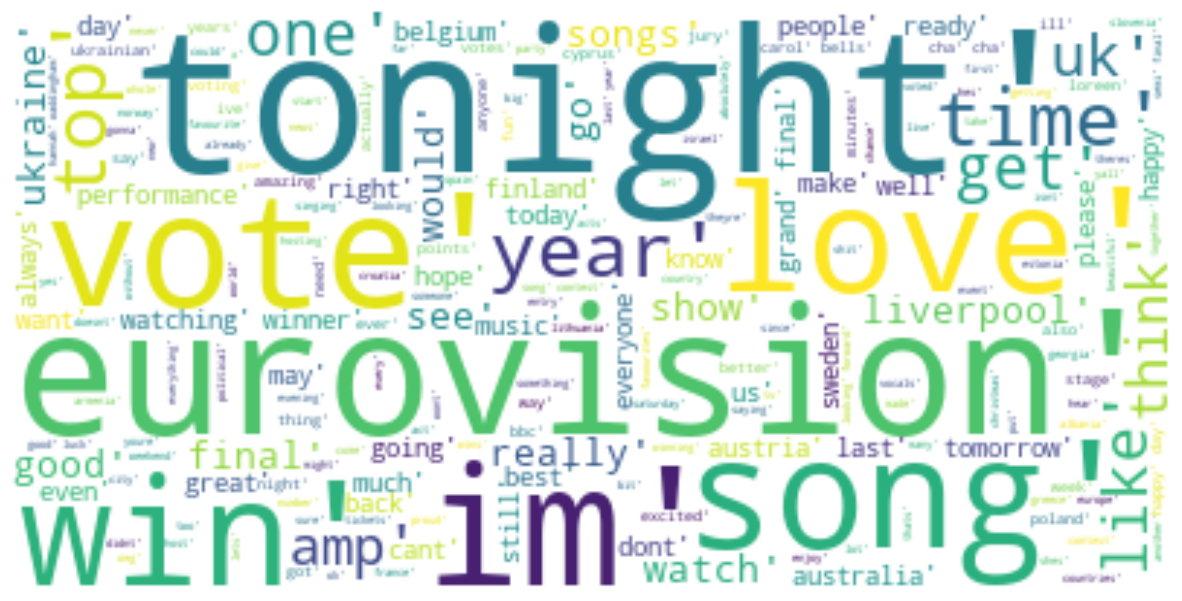

In [22]:
# Visualization
text = " ".join(str(i) for i in dataBefore.clean_tweet_stopwords )
wordcloud = WordCloud( background_color="white").generate(text)
plt.figure( figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [23]:
# Hashtag analyzing
hashtag_counts = Counter()
for tweet in dataBefore['text']:
    hashtags = [tag.strip("#") for tag in tweet.split() if tag.startswith("#")]
    hashtag_counts.update(hashtags)

print("En popüler 20 hashtag:")
for hashtag, count in hashtag_counts.most_common(20):
    print("{}: {}".format(hashtag, count))

En popüler 20 hashtag:
Eurovision: 3175
Eurovision2023: 646
eurovision: 465
EUROVISION: 237
ESC2023: 67
UnitedByMusic: 50
Liverpool: 43
imran_Khan: 40
EUROVISION2023: 35
Ukraine: 31
vintage: 31
Eurovision.: 30
r4today: 27
TheOneShow: 26
Austria: 24
Australia: 24
SBSEurovision: 23
ZeldaTOTK: 22
sustainable: 21
giftideas: 20


## 2. Sentiment Analysis

In [24]:
# Polarity
#Sentiment Analysis
SIA = SentimentIntensityAnalyzer()
dataBefore["clean_tweet"]= dataBefore["clean_tweet"].astype(str)
# Applying Model, Variable Creation
dataBefore['Polarity Score']=dataBefore["clean_tweet"].apply(lambda x:SIA.polarity_scores(x)['compound'])
dataBefore['Neutral Score']=dataBefore["clean_tweet"].apply(lambda x:SIA.polarity_scores(x)['neu'])
dataBefore['Negative Score']=dataBefore["clean_tweet"].apply(lambda x:SIA.polarity_scores(x)['neg'])
dataBefore['Positive Score']=dataBefore["clean_tweet"].apply(lambda x:SIA.polarity_scores(x)['pos'])
# Converting 0 to 1 Decimal Score to a Categorical Variable
dataBefore['Sentiment']=''
dataBefore.loc[dataBefore['Polarity Score']>0,'Sentiment']='Positive'
dataBefore.loc[dataBefore['Polarity Score']==0,'Sentiment']='Neutral'
dataBefore.loc[dataBefore['Polarity Score']<0,'Sentiment']='Negative'
dataBefore[:20]


id                                               text   
0   1.656760e+18  Hannah Waddingham really is a gem. What a fab ...  \
1   1.656760e+18  Australia should win Eurovision. Fight me. #Eu...   
2   1.656760e+18       Christmas music at Eurovision? \n#Eurovision   
3   1.656760e+18  GEORGIA HAS TO QUALIFY OMG THAY WAS SO GOOD 😭😭...   
4   1.656760e+18  I’ve seen nothing tonight to challenge Finland...   
5   1.656760e+18  That was beautiful. #Ukraine artists showed th...   
6   1.656760e+18  Fwiw Denmark, Belgium, Iceland, Poland, Austia...   
7   1.656760e+18  "You're voting for Slovenia" x20 is not enough...   
8   1.656760e+18  YALL BETTER BETTER GET ALBANIA INTO THE FINAL!...   
9   1.656760e+18  These vocals leave a lot to be desired. Sorry ...   
10  1.656760e+18  15p to vote via app?! Bloody cheek! \n\n#Eurov...   
11  1.656760e+18        Cmon Cyprus &amp; Poland\n🇨🇾 🇵🇱 #eurovision   
12  1.656760e+18  #EUROVISION  #Eurovision2023  #EurovisionRtve ...   
13  1.656760e+18  You want us to pay to vote for songs?? Not in ...   
14  1.656760e+18  Voted for Slovenia,  Iceland, Belgium and Aust...   
15  1.656760e+18  @Eurovision Most interesting thing tonight….. ...   
16  1.656760e+18  Are we missing out on Graham Norton's hilariou...   
17  1.656760e+18  My top five of the #Eurovision  Semi Final 2:\...   
18  1.656760e+18  Cyprus. Iceland. Belgium. Although I’m unsure ...   
19  1.656760e+18  My qualifiers for the SF2: 🇦🇲🇪🇪🇧🇪🇮🇸🇸🇮🇬🇪🇦🇹🇦🇱🇱🇹🇦...   

                   created_at   
0   2023-05-11 20:36:48+00:00  \
1   2023-05-11 20:36:47+00:00   
2   2023-05-11 20:36:46+00:00   
3   2023-05-11 20:36:45+00:00   
4   2023-05-11 20:36:44+00:00   
5   2023-05-11 20:36:44+00:00   
6   2023-05-11 20:36:44+00:00   
7   2023-05-11 20:36:44+00:00   
8   2023-05-11 20:36:43+00:00   
9   2023-05-11 20:36:42+00:00   
10  2023-05-11 20:36:42+00:00   
11  2023-05-11 20:36:42+00:00   
12  2023-05-11 20:36:40+00:00   
13  2023-05-11 20:36:39+00:00   
14  2023-05-11 20:36:39+00:00   
15  2023-05-11 20:36:38+00:00   
16  2023-05-11 20:36:38+00:00   
17  2023-05-11 20:36:37+00:00   
18  2023-05-11 20:36:37+00:00   
19  2023-05-11 20:36:36+00:00   

                                          clean_tweet   
0   hannah waddingham really is a gem what a fab c...  \
1            australia should win eurovision fight me   
2                       christmas music at eurovision   
3         georgia has to qualify omg thay was so good   
4   ive seen nothing tonight to challenge finland ...   
5   that was beautiful artists showed the world wh...   
6   fwiw denmark belgium iceland poland austia aus...   
7   youre voting for slovenia  is not enough i nee...   
8       yall better better get albania into the final   
9   these vocals leave a lot to be desired sorry v...   
10                     p to vote via app bloody cheek   
11                             cmon cyprus amp poland   
12                    my qualifiers my non qualifiers   
13  you want us to pay to vote for songs not in th...   
14     voted for slovenia iceland belgium and austria   
15                  most interesting thing tonight at   
16  are we missing out on graham nortons hilarious...   
17                     my top five of the semi final    
18  cyprus iceland belgium although im unsure abou...   
19                             my qualifiers for the    

                                clean_tweet_stopwords  Polarity Score   
0   [hannah, waddingham, really, gem, fab, choice,...          0.4588  \
1                 [australia, win, eurovision, fight]          0.2960   
2                      [christmas, music, eurovision]          0.0000   
3                 [georgia, qualify, omg, thay, good]          0.5777   
4   [ive, seen, nothing, tonight, challenge, finla...          0.3134   
5   [beautiful, artists, showed, world, civilised,...          0.1027   
6   [fwiw, denmark, belgium, iceland, poland, aust...         -0.2411   
7   [youre, voting, slovenia, enough, need, he

In [25]:
temp = dataBefore.groupby('Sentiment').count()['text'].reset_index().sort_values(by='text',ascending=False)
temp.style.background_gradient(cmap='Purples')

<Axes: xlabel='Sentiment', ylabel='count'>

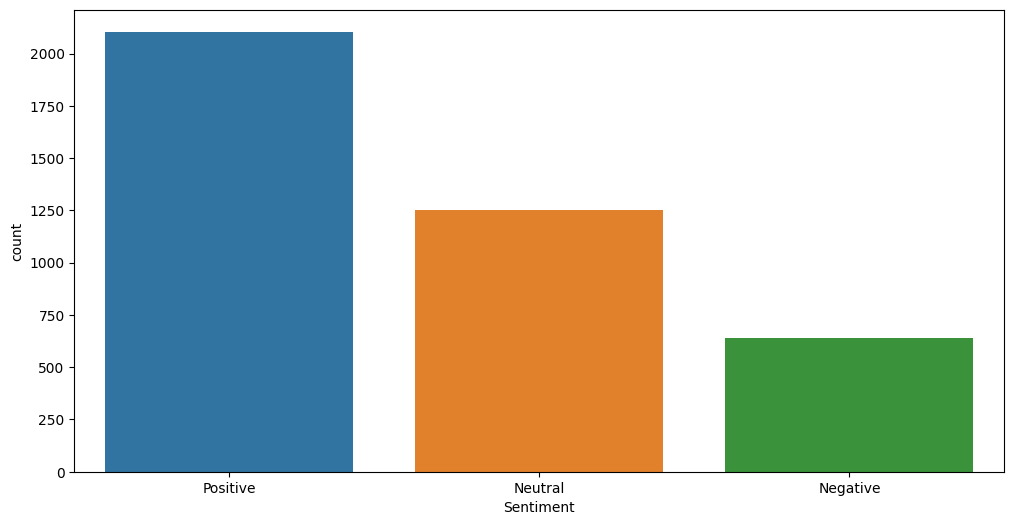

In [26]:
plt.figure(figsize=(12,6))
sns.countplot(x='Sentiment',data=dataBefore)

In [27]:

fig = go.Figure(go.Funnelarea(
    text =temp.Sentiment,
    values = temp.text,
    title = {"position": "top center", "text": "Funnel-Chart of Sentiment Distribution"}
    ))
fig.show()

### 2.1. Most common words Sentiments Wise

In [28]:
Positive_sent = dataBefore[dataBefore['Sentiment']=='Positive']
Negative_sent = dataBefore[dataBefore['Sentiment']=='Negative']
Neutral_sent = dataBefore[dataBefore['Sentiment']=='Neutral']

#### 2.1.1. Positive

In [29]:
#MosT common positive words
top = Counter([item for sublist in Positive_sent['clean_tweet_stopwords'] for item in sublist])
temp_positive = pd.DataFrame(top.most_common(20))
temp_positive.columns = ['Common_words','count']
temp_positive.style.background_gradient(cmap='Greens')

In [30]:
fig = px.bar(temp_positive, x="count", y="Common_words", title='Most Commmon Positive Words', orientation='h', 
             width=700, height=700,color='Common_words')
fig.show()

#### 2.1.2. Negative

In [31]:
#MosT common negative words
top = Counter([item for sublist in Negative_sent['clean_tweet_stopwords'] for item in sublist])
temp_negative = pd.DataFrame(top.most_common(20))
temp_negative = temp_negative.iloc[1:,:]
temp_negative.columns = ['Common_words','count']
temp_negative.style.background_gradient(cmap='Reds')

In [27]:
fig = px.bar(temp_negative, x="count", y="Common_words", title='Most Commmon Negative Words', orientation='h', 
             width=700, height=700,color='Common_words')
fig.show()

#### 2.1.3. Neutral 

In [32]:
#MosT common Neutral words
top = Counter([item for sublist in Neutral_sent['clean_tweet_stopwords'] for item in sublist])
temp_neutral = pd.DataFrame(top.most_common(20))
temp_neutral = temp_neutral.loc[1:,:]
temp_neutral.columns = ['Common_words','count']
temp_neutral.style.background_gradient(cmap='Blues')

In [33]:
fig = px.bar(temp_neutral, x="count", y="Common_words", title='Most Commmon Neutral Words', orientation='h', 
             width=700, height=700,color='Common_words')
fig.show()

### 2.2. Unique Words in each Segment

In [34]:
raw_text = [word for word_list in dataBefore['clean_tweet_stopwords'] for word in word_list]
raw_text

['hannah',
 'waddingham',
 'really',
 'gem',
 'fab',
 'choice',
 'presenter',
 'australia',
 'win',
 'eurovision',
 'fight',
 'christmas',
 'music',
 'eurovision',
 'georgia',
 'qualify',
 'omg',
 'thay',
 'good',
 'ive',
 'seen',
 'nothing',
 'tonight',
 'challenge',
 'finland',
 'croatia',
 'belgiumalbaniapolandaustria',
 'okexcited',
 'saturday',
 'though',
 'drinks',
 'spread',
 'ready',
 'beautiful',
 'artists',
 'showed',
 'world',
 'civilised',
 'country',
 'fuck',
 'show',
 'animals',
 'call',
 'soldiers',
 'fwiw',
 'denmark',
 'belgium',
 'iceland',
 'poland',
 'austia',
 'australia',
 'sure',
 'id',
 'actually',
 'spend',
 'p',
 'though',
 'maybe',
 'poland',
 'saturday',
 'youre',
 'voting',
 'slovenia',
 'enough',
 'need',
 'hear',
 'week',
 'straight',
 'pls',
 'bf',
 'gets',
 'home',
 'phone',
 'mine',
 'yall',
 'better',
 'better',
 'get',
 'albania',
 'final',
 'vocals',
 'leave',
 'lot',
 'desired',
 'sorry',
 'victor',
 'id',
 'stick',
 'boxing',
 'time',
 'yikes',
 '

### Positive Tweets

In [35]:
def words_unique(Sentiment,numwords,raw_words):

    allother = []
    for item in dataBefore[dataBefore.Sentiment != Sentiment]['clean_tweet_stopwords']:
        for word in item:
            allother.append(word)
    allother  = list(set(allother ))
    
    specificnonly = [x for x in raw_text if x not in allother]
    
    mycounter = Counter()
    
    for item in dataBefore[dataBefore.Sentiment == Sentiment]['clean_tweet_stopwords']:
        for word in item:
            mycounter[word] += 1
    keep = list(specificnonly)
    for word in list(mycounter):
        if word not in keep:
            del mycounter[word]
    
    Unique_words = pd.DataFrame(mycounter.most_common(numwords), columns = ['words','count'])
    
    return Unique_words    

In [36]:
Unique_Positive= words_unique('Positive', 20, raw_text)
print("The top 20 unique words in Positive Tweets are:")
Unique_Positive.style.background_gradient(cmap='Greens')

The top 20 unique words in Positive Tweets are:


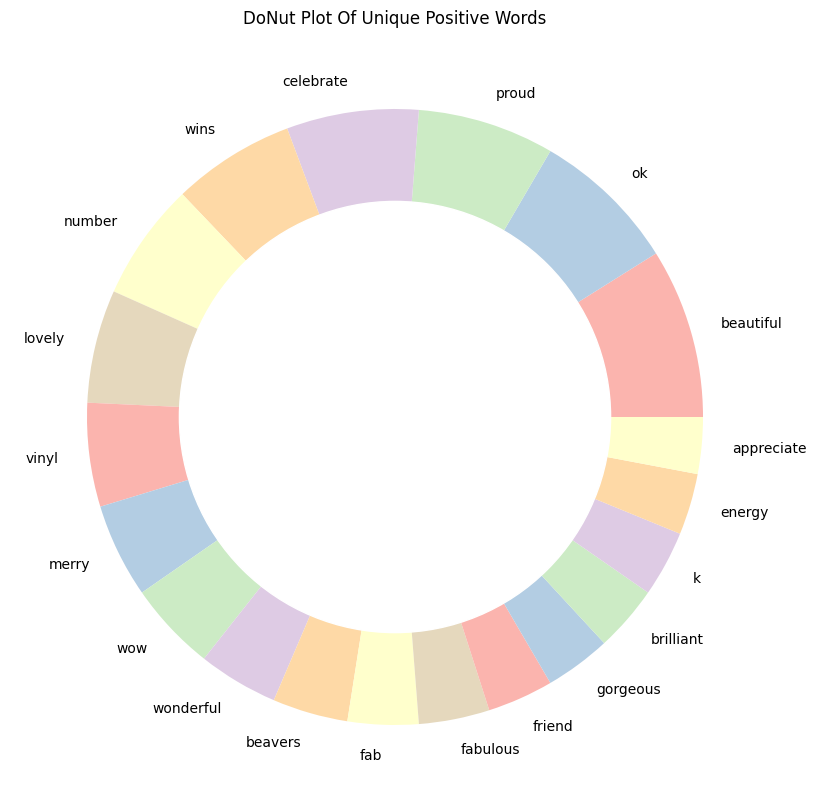

In [37]:
from palettable.colorbrewer.qualitative import Pastel1_7
plt.figure(figsize=(16,10))
my_circle=plt.Circle((0,0), 0.7, color='white')
plt.pie(Unique_Positive['count'], labels=Unique_Positive.words, colors=Pastel1_7.hex_colors)
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.title('DoNut Plot Of Unique Positive Words')
plt.show()

### Negative Tweets

In [38]:
Unique_Negative= words_unique('Negative', 20, raw_text)
print("The top 20 unique words in Negative Tweets are:")
Unique_Negative.style.background_gradient(cmap='Reds')

The top 20 unique words in Negative Tweets are:


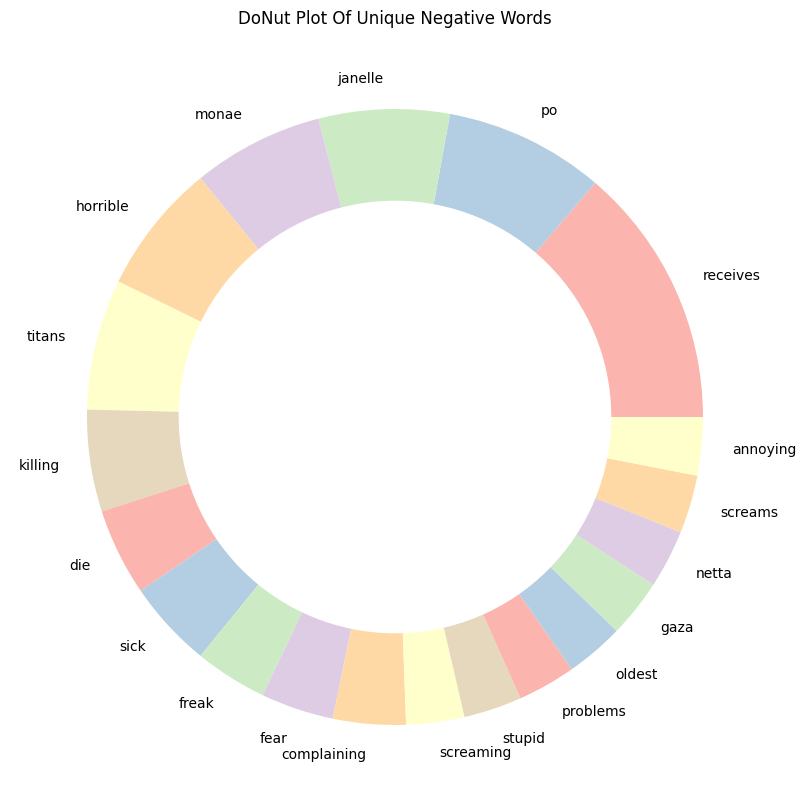

In [39]:
plt.figure(figsize=(16,10))
my_circle=plt.Circle((0,0), 0.7, color='white')
plt.rcParams['text.color'] = 'black'
plt.pie(Unique_Negative['count'], labels=Unique_Negative.words, colors=Pastel1_7.hex_colors)
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.title('DoNut Plot Of Unique Negative Words')
plt.show()

### Neutral Tweets

In [40]:
Unique_Neutral= words_unique('Neutral', 20, raw_text)
print("The top 10 unique words in Neutral Tweets are:")
Unique_Neutral.style.background_gradient(cmap='Oranges')

The top 10 unique words in Neutral Tweets are:


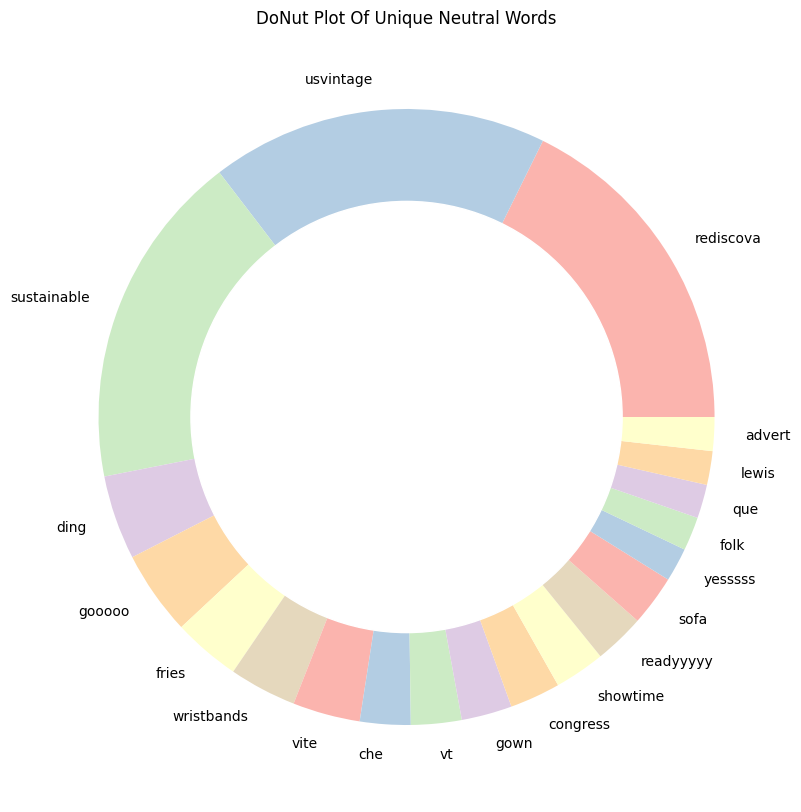

In [41]:
from palettable.colorbrewer.qualitative import Pastel1_7
plt.figure(figsize=(16,10))
my_circle=plt.Circle((0,0), 0.7, color='white')
plt.pie(Unique_Neutral['count'], labels=Unique_Neutral.words, colors=Pastel1_7.hex_colors)
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.title('DoNut Plot Of Unique Neutral Words')
plt.show()

# AFTER THE EUROVISION FINALS

## 1. Data Understanding

In [51]:
dataAfter = twitterDataAfter

In [52]:
dataAfter.shape

(3632, 3)

In [53]:
dataAfter.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3632 entries, 0 to 3631
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   id          3632 non-null   float64
 1   text        3632 non-null   object 
 2   created_at  3632 non-null   object 
dtypes: float64(1), object(2)
memory usage: 85.2+ KB


In [54]:
dataAfter.head()

id                                               text   
0  1.657764e+18  Full semester\nFinal Exam\nTerm Paper\n\nCrimi...  \
1  1.657764e+18  The only two things were great about #Eurovisi...   
2  1.657764e+18  I love Eurovision, but how did Austria not do ...   
3  1.657764e+18  Honestly, after listening to some of the #Euro...   
4  1.657764e+18  I don't know much about #Eurovision , but I do...   

                  created_at  
0  2023-05-14 15:06:53+00:00  
1  2023-05-14 15:06:50+00:00  
2  2023-05-14 15:06:46+00:00  
3  2023-05-14 15:06:28+00:00  
4  2023-05-14 15:06:22+00:00

### 1.1. Cleaning Data

In [59]:
def preprocess_tweet(row):
    text = row['text']
    text = p.clean(text)
    text = str(text).lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    return text
dataAfter['clean_tweet'] = dataAfter.apply(preprocess_tweet, axis=1)
dataAfter[:6]

id                                               text   
0  1.657764e+18  Full semester\nFinal Exam\nTerm Paper\n\nCrimi...  \
1  1.657764e+18  The only two things were great about #Eurovisi...   
2  1.657764e+18  I love Eurovision, but how did Austria not do ...   
3  1.657764e+18  Honestly, after listening to some of the #Euro...   
4  1.657764e+18  I don't know much about #Eurovision , but I do...   
5  1.657764e+18  @TaraH4444 @RevRichardColes You say that but a...   

                  created_at   
0  2023-05-14 15:06:53+00:00  \
1  2023-05-14 15:06:50+00:00   
2  2023-05-14 15:06:46+00:00   
3  2023-05-14 15:06:28+00:00   
4  2023-05-14 15:06:22+00:00   
5  2023-05-14 15:05:56+00:00   

                                         clean_tweet  
0  full semesterfinal examterm papercriminologyph...  
1  the only two things were great about was  we u...  
2  i love eurovision but how did austria not do b...  
3  honestly after listening to some of the songs ...  
4  i dont know much about  but i do know that cha...  
5  you say that but a few years ago darkness ente...

In [60]:
# Remove stop words
stop = stopwords.words('english')
dataAfter['clean_tweet_stopwords'] = dataAfter['clean_tweet'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))
dataAfter['clean_tweet_stopwords'][:5]

0    full semesterfinal examterm papercriminologyph...
1    two things great used english stupid frog spee...
2    love eurovision austria better absolute banger...
3    honestly listening songs today drive home germ...
4       dont know much know cha cha cha cha cha robbed
Name: clean_tweet_stopwords, dtype: object

### 2.2. Analysis of Tweets

In [61]:
# Most Used Words
a = dataAfter['clean_tweet_stopwords'].str.cat(sep=' ')
words = nltk.tokenize.word_tokenize(a)
word_dist = nltk.FreqDist(words)
dff = pd.DataFrame(word_dist.most_common(), 
                    columns=['Word', 'Frequency'])
dff['Word_Count'] = dff.Word.apply(len)
dff[:10]

Word  Frequency  Word_Count
0         cha        424           3
1        song        412           4
2        year        411           4
3  eurovision        331          10
4        like        285           4
5        last        279           4
6      people        249           6
7          im        247           2
8      sweden        234           6
9      loreen        228           6

In [62]:
# Count the common words
dataAfter['clean_tweet_stopwords']= dataAfter['clean_tweet_stopwords'].apply(lambda x:str(x).split())
top = Counter([item for sublist in dataAfter['clean_tweet_stopwords'] for item in sublist])
temp = pd.DataFrame(top.most_common(20))
temp.columns = ['Common_words','count']
temp.style.background_gradient(cmap='Blues')

In [63]:
fig = px.bar(temp, x="count", y="Common_words", title='Commmon Words in Selected Text', orientation='h', 
             width=700, height=700,color='Common_words')
fig.show()

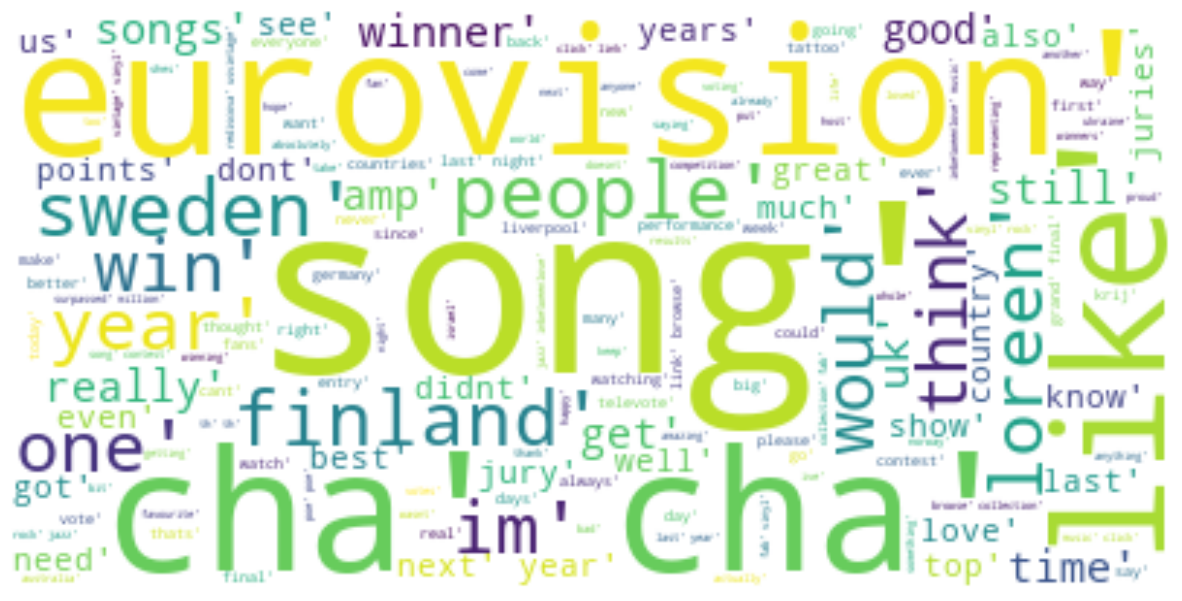

In [64]:
# Visualization
text = " ".join(str(i) for i in dataAfter.clean_tweet_stopwords )
wordcloud = WordCloud( background_color="white").generate(text)
plt.figure( figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [65]:
# Hashtag analyzing
hashtag_counts = Counter()
for tweet in dataAfter['text']:
    hashtags = [tag.strip("#") for tag in tweet.split() if tag.startswith("#")]
    hashtag_counts.update(hashtags)

print("Most Popular 10 hashtag:")
for hashtag, count in hashtag_counts.most_common(20):
    print("{}: {}".format(hashtag, count))

Most Popular 10 hashtag:
Eurovision: 3102
Eurovision2023: 469
eurovision: 315
96hrs: 126
SBSEurovision: 125
MothersDay: 92
vintage: 86
100hrs: 73
เลือกตั้ง66: 69
EUROVISION: 64
music: 54
BLACKPINK: 53
ESC2023: 52
mondaymotivation: 50
GIDLE: 50
vinyl: 46
groovevinyl: 46
vinyladdict: 46
livemusic: 46
EUROVISION2023: 42


## 2. Sentiment Analysis

In [66]:
# Polarity
#Sentiment Analysis
SIA = SentimentIntensityAnalyzer()
dataAfter["clean_tweet"]= dataAfter["clean_tweet"].astype(str)
# Applying Model, Variable Creation
dataAfter['Polarity Score']=dataAfter["clean_tweet"].apply(lambda x:SIA.polarity_scores(x)['compound'])
dataAfter['Neutral Score']=dataAfter["clean_tweet"].apply(lambda x:SIA.polarity_scores(x)['neu'])
dataAfter['Negative Score']=dataAfter["clean_tweet"].apply(lambda x:SIA.polarity_scores(x)['neg'])
dataAfter['Positive Score']=dataAfter["clean_tweet"].apply(lambda x:SIA.polarity_scores(x)['pos'])
# Converting 0 to 1 Decimal Score to a Categorical Variable
dataAfter['Sentiment']=''
dataAfter.loc[dataAfter['Polarity Score']>0,'Sentiment']='Positive'
dataAfter.loc[dataAfter['Polarity Score']==0,'Sentiment']='Neutral'
dataAfter.loc[dataAfter['Polarity Score']<0,'Sentiment']='Negative'
dataAfter[:20]


id                                               text   
0   1.657764e+18  Full semester\nFinal Exam\nTerm Paper\n\nCrimi...  \
1   1.657764e+18  The only two things were great about #Eurovisi...   
2   1.657764e+18  I love Eurovision, but how did Austria not do ...   
3   1.657764e+18  Honestly, after listening to some of the #Euro...   
4   1.657764e+18  I don't know much about #Eurovision , but I do...   
5   1.657764e+18  @TaraH4444 @RevRichardColes You say that but a...   
6   1.657764e+18  Anyone else got Cha Cha Cha stuck in their hea...   
7   1.657764e+18  Am I the only one who sees the similarities be...   
8   1.657764e+18  I’m guessing Christer Bjorkman is ready for #E...   
9   1.657764e+18  Finland dancer holding up the handwritten “hi ...   
10  1.657764e+18                    abolish jury voting #Eurovision   
11  1.657764e+18  Wouldn’t have minded Loreen winning #Eurovisio...   
12  1.657764e+18  I see people from 🇨🇵🇪🇦🇩🇪 saying that they want...   
13  1.657764e+18  I am gutted for our Mae. We went from 2nd down...   
14  1.657764e+18  One of my biggest problems with #Eurovision is...   
15  1.657764e+18  Get online class homework, exam help \nPsychol...   
16  1.657764e+18  Congratulations to Sweden 🇸🇪 but Finland are o...   
17  1.657764e+18  @Eurovision @SteveHReports @LOREEN_TALHAOUI #L...   
18  1.657764e+18  -2019 Keiino, Spirit in the Sky +251 (Record a...   
19  1.657764e+18  Remember guys. If Erdogan lose tonight, the pr...   

                   created_at   
0   2023-05-14 15:06:53+00:00  \
1   2023-05-14 15:06:50+00:00   
2   2023-05-14 15:06:46+00:00   
3   2023-05-14 15:06:28+00:00   
4   2023-05-14 15:06:22+00:00   
5   2023-05-14 15:05:56+00:00   
6   2023-05-14 15:05:52+00:00   
7   2023-05-14 15:05:38+00:00   
8   2023-05-14 15:05:37+00:00   
9   2023-05-14 15:05:35+00:00   
10  2023-05-14 15:05:26+00:00   
11  2023-05-14 15:05:14+00:00   
12  2023-05-14 15:04:55+00:00   
13  2023-05-14 15:04:41+00:00   
14  2023-05-14 15:04:40+00:00   
15  2023-05-14 15:04:36+00:00   
16  2023-05-14 15:04:27+00:00   
17  2023-05-14 15:04:06+00:00   
18  2023-05-14 15:03:34+00:00   
19  2023-05-14 15:03:29+00:00   

                                          clean_tweet   
0   full semesterfinal examterm papercriminologyph...  \
1   the only two things were great about was  we u...   
2   i love eurovision but how did austria not do b...   
3   honestly after listening to some of the songs ...   
4   i dont know much about  but i do know that cha...   
5   you say that but a few years ago darkness ente...   
6   anyone else got cha cha cha stuck in their hea...   
7   am i the only one who sees the similarities be...   
8          im guessing christer bjorkman is ready for   
9   finland dancer holding up the handwritten hi m...   
10                                abolish jury voting   
11  wouldnt have minded loreen winning quite as mu...   
12  i see people from saying that they want their ...   
13  i am gutted for our mae we went from nd down t...   
14  one of my biggest problems with is every year ...   
15  get online class homework exam help psychology...   
16  congratulations to sweden but finland are our ...   
17      wins dress rehearsal wins final and semifinal   
18  keiino spirit in the sky  record absoluto incl...   
19  remember guys if erdogan lose tonight the prob...   

                                clean_tweet_stopwords  Polarity Score   
0   [full, semesterfinal, examterm, papercriminolo...          0.0000  \
1   [two, things, great, used, english, stupid, fr...         -0.5994   
2   [love, eurovision, austria, better, absolute, ...         -0.1303   
3   [honestly, listening, songs, today, drive, hom...          0.3150   
4   [dont, know, much, know, cha, cha, cha, cha, c...          0.0000   
5   [say, years, ago, darkness, entered, song, eur...         -0.7351   
6   [anyone, else, got, cha, cha, cha, stuck, head...         -0.2500   
7   [one, sees, similarities, loreens, tattoo,

In [67]:
temp = dataAfter.groupby('Sentiment').count()['text'].reset_index().sort_values(by='text',ascending=False)
temp.style.background_gradient(cmap='Purples')

<Axes: xlabel='Sentiment', ylabel='count'>

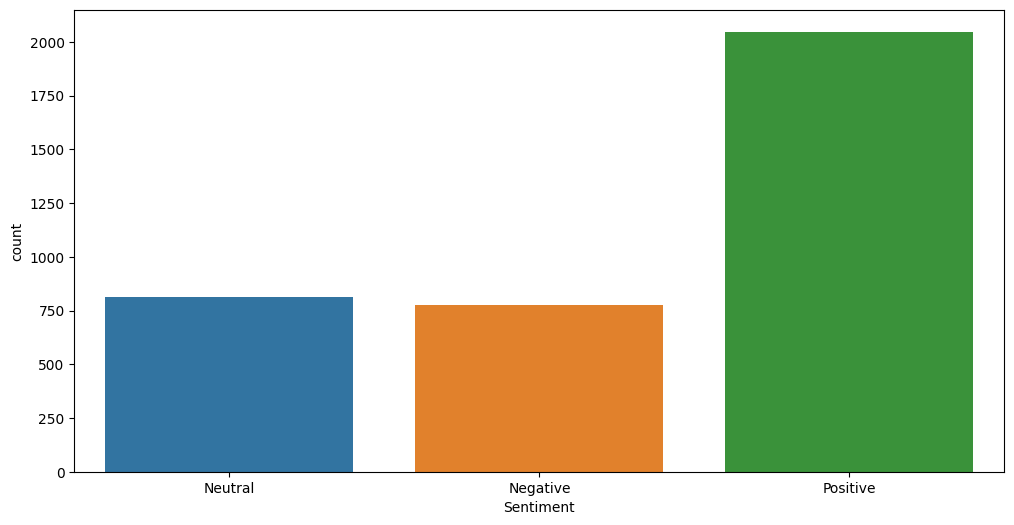

In [68]:
plt.figure(figsize=(12,6))
sns.countplot(x='Sentiment',data=dataAfter)

In [69]:
fig = go.Figure(go.Funnelarea(
    text =temp.Sentiment,
    values = temp.text,
    title = {"position": "top center", "text": "Funnel-Chart of Sentiment Distribution"}
    ))
fig.show()

### 2.1. Most common words Sentiments Wise

In [70]:
Positive_sent = dataAfter[dataAfter['Sentiment']=='Positive']
Negative_sent = dataAfter[dataAfter['Sentiment']=='Negative']
Neutral_sent = dataAfter[dataAfter['Sentiment']=='Neutral']

#### 2.1.1. Positive

In [71]:
#MosT common positive words
top = Counter([item for sublist in Positive_sent['clean_tweet_stopwords'] for item in sublist])
temp_positive = pd.DataFrame(top.most_common(20))
temp_positive.columns = ['Common_words','count']
temp_positive.style.background_gradient(cmap='Greens')

In [72]:
fig = px.bar(temp_positive, x="count", y="Common_words", title='Most Commmon Positive Words', orientation='h', 
             width=700, height=700,color='Common_words')
fig.show()

#### 2.1.2. Negative

In [73]:
#MosT common negative words
top = Counter([item for sublist in Negative_sent['clean_tweet_stopwords'] for item in sublist])
temp_negative = pd.DataFrame(top.most_common(20))
temp_negative = temp_negative.iloc[1:,:]
temp_negative.columns = ['Common_words','count']
temp_negative.style.background_gradient(cmap='Reds')

In [74]:
fig = px.bar(temp_negative, x="count", y="Common_words", title='Most Commmon Negative Words', orientation='h', 
             width=700, height=700,color='Common_words')
fig.show()

#### 2.1.3. Neutral 

In [75]:
#MosT common Neutral words
top = Counter([item for sublist in Neutral_sent['clean_tweet_stopwords'] for item in sublist])
temp_neutral = pd.DataFrame(top.most_common(20))
temp_neutral = temp_neutral.loc[1:,:]
temp_neutral.columns = ['Common_words','count']
temp_neutral.style.background_gradient(cmap='Blues')

In [76]:
fig = px.bar(temp_neutral, x="count", y="Common_words", title='Most Commmon Neutral Words', orientation='h', 
             width=700, height=700,color='Common_words')
fig.show()

### 2.2. Unique Words in each Segment

In [77]:
raw_text = [word for word_list in dataAfter['clean_tweet_stopwords'] for word in word_list]
raw_text

['full',
 'semesterfinal',
 'examterm',
 'papercriminologypharmacologypublic',
 'relationspublic',
 'healthcarenursingpsychologycomputer',
 'scienceaccountingrstudiobusinessmathalgebra',
 'two',
 'things',
 'great',
 'used',
 'english',
 'stupid',
 'frog',
 'speech',
 'stupid',
 'far',
 'left',
 'mae',
 'muller',
 'beat',
 'germans',
 'last',
 'place',
 'taxi',
 'muller',
 'love',
 'eurovision',
 'austria',
 'better',
 'absolute',
 'banger',
 'also',
 'hannah',
 'waddingam',
 'absolute',
 'queen',
 'honestly',
 'listening',
 'songs',
 'today',
 'drive',
 'home',
 'german',
 'got',
 'absolutely',
 'shit',
 'deserved',
 'much',
 'better',
 'dont',
 'know',
 'much',
 'know',
 'cha',
 'cha',
 'cha',
 'cha',
 'cha',
 'robbed',
 'say',
 'years',
 'ago',
 'darkness',
 'entered',
 'song',
 'europe',
 'really',
 'decent',
 'poprock',
 'song',
 'beaten',
 'scooch',
 'became',
 'entry',
 'remember',
 'eurovision',
 'different',
 'beast',
 'regular',
 'britishamerican',
 'music',
 'industry',
 'an

### Positive Tweets

In [78]:
def words_unique(Sentiment,numwords,raw_words):

    allother = []
    for item in dataAfter[dataAfter.Sentiment != Sentiment]['clean_tweet_stopwords']:
        for word in item:
            allother.append(word)
    allother  = list(set(allother ))
    
    specificnonly = [x for x in raw_text if x not in allother]
    
    mycounter = Counter()
    
    for item in dataAfter[dataAfter.Sentiment == Sentiment]['clean_tweet_stopwords']:
        for word in item:
            mycounter[word] += 1
    keep = list(specificnonly)
    for word in list(mycounter):
        if word not in keep:
            del mycounter[word]
    
    Unique_words = pd.DataFrame(mycounter.most_common(numwords), columns = ['words','count'])
    
    return Unique_words    

In [79]:
Unique_Positive= words_unique('Positive', 20, raw_text)
print("The top 20 unique words in Positive Tweets are:")
Unique_Positive.style.background_gradient(cmap='Greens')

The top 20 unique words in Positive Tweets are:


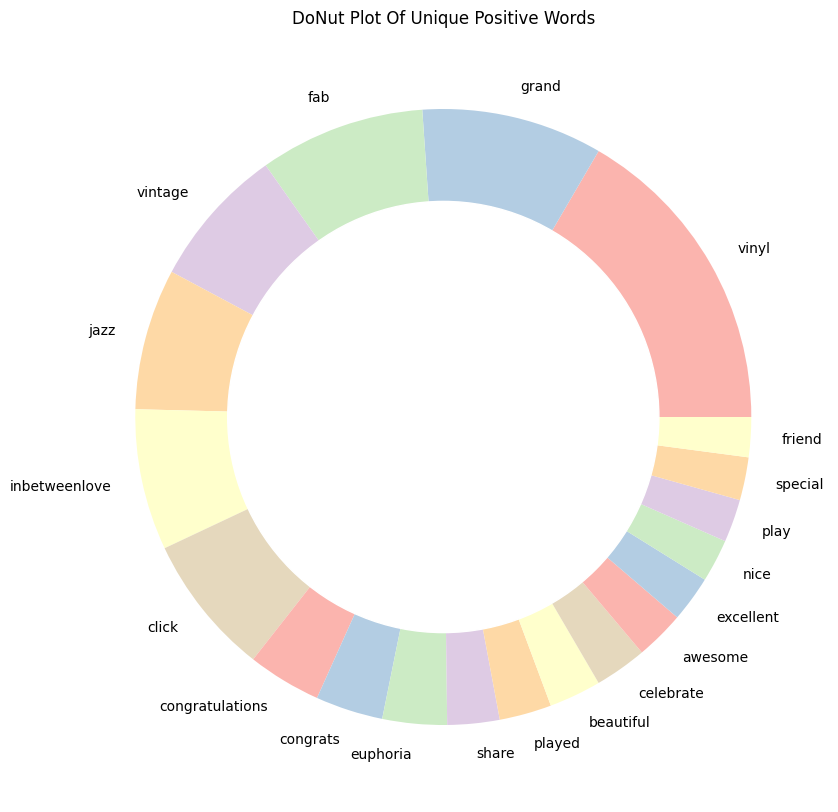

In [80]:
plt.figure(figsize=(16,10))
my_circle=plt.Circle((0,0), 0.7, color='white')
plt.pie(Unique_Positive['count'], labels=Unique_Positive.words, colors=Pastel1_7.hex_colors)
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.title('DoNut Plot Of Unique Positive Words')
plt.show()

### Negative Tweets

In [81]:
Unique_Negative= words_unique('Negative', 20, raw_text)
print("The top 20 unique words in Negative Tweets are:")
Unique_Negative.style.background_gradient(cmap='Reds')

The top 20 unique words in Negative Tweets are:


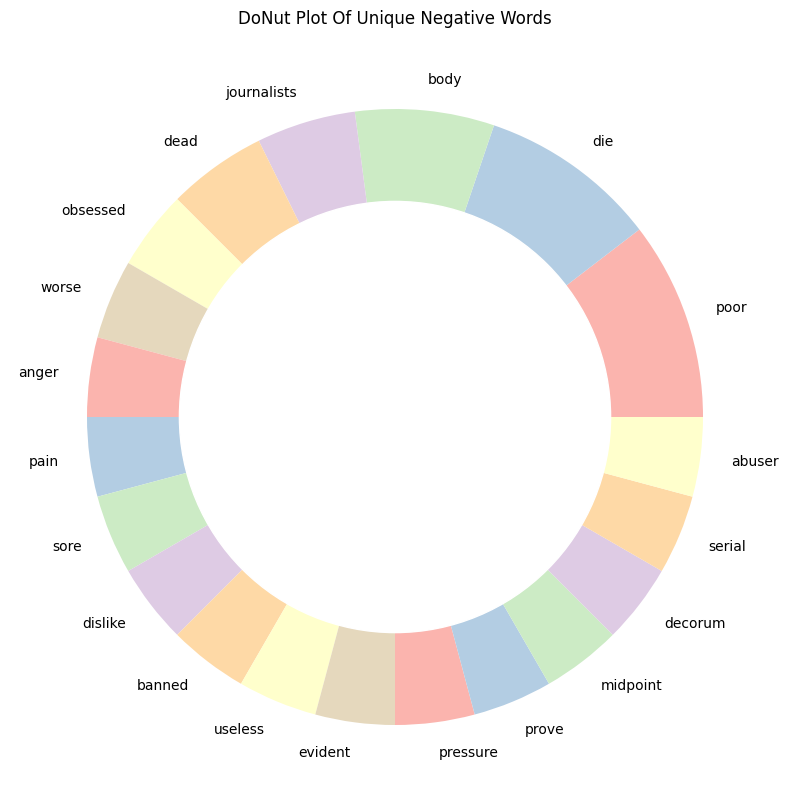

In [82]:
plt.figure(figsize=(16,10))
my_circle=plt.Circle((0,0), 0.7, color='white')
plt.rcParams['text.color'] = 'black'
plt.pie(Unique_Negative['count'], labels=Unique_Negative.words, colors=Pastel1_7.hex_colors)
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.title('DoNut Plot Of Unique Negative Words')
plt.show()

### Neutral Tweets

In [83]:
Unique_Neutral= words_unique('Neutral', 20, raw_text)
print("The top 10 unique words in Neutral Tweets are:")
Unique_Neutral.style.background_gradient(cmap='Oranges')

The top 10 unique words in Neutral Tweets are:


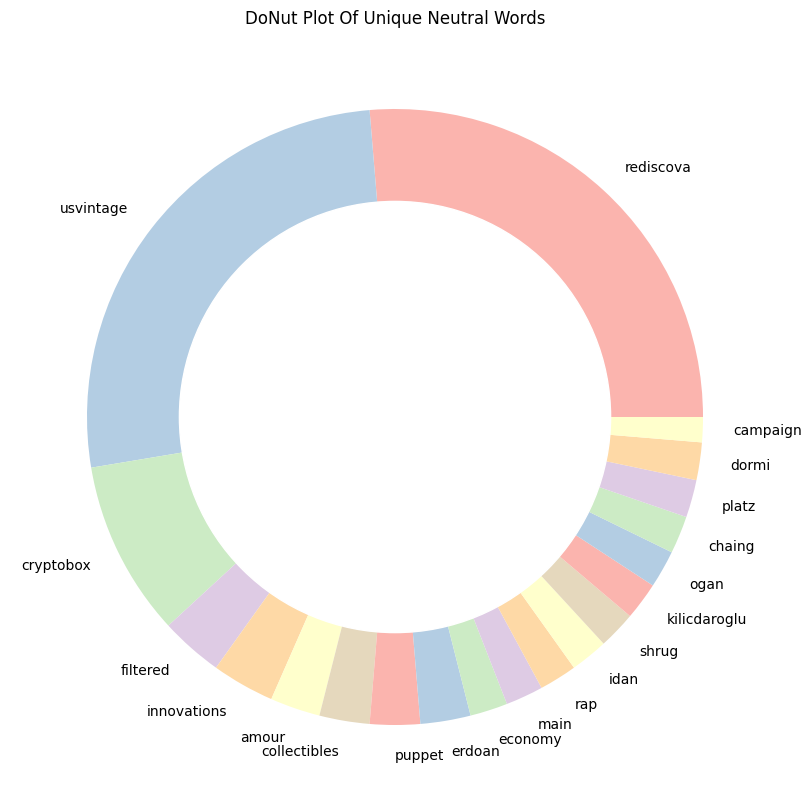

In [84]:
plt.figure(figsize=(16,10))
my_circle=plt.Circle((0,0), 0.7, color='white')
plt.pie(Unique_Neutral['count'], labels=Unique_Neutral.words, colors=Pastel1_7.hex_colors)
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.title('DoNut Plot Of Unique Neutral Words')
plt.show()

# MODELLING DATA

In [85]:
dataModelling = pd.concat([dataAfter, dataBefore], ignore_index=True)
dataModelling

id                                               text   
0     1.657764e+18  Full semester\nFinal Exam\nTerm Paper\n\nCrimi...  \
1     1.657764e+18  The only two things were great about #Eurovisi...   
2     1.657764e+18  I love Eurovision, but how did Austria not do ...   
3     1.657764e+18  Honestly, after listening to some of the #Euro...   
4     1.657764e+18  I don't know much about #Eurovision , but I do...   
...            ...                                                ...   
7627  1.657453e+18         HALF AN HOUR LEFT, EVERYONE!!! #Eurovision   
7628  1.657453e+18  @melindahaunton Eating dinner post-gym pre-#Eu...   
7629  1.657453e+18  I kinda fell out of love with #eurovision a fe...   
7630  1.657453e+18  God I so wish I was home right now. Things lik...   
7631  1.657453e+18  Really excited to see Liverpool show off tonig...   

                     created_at   
0     2023-05-14 15:06:53+00:00  \
1     2023-05-14 15:06:50+00:00   
2     2023-05-14 15:06:46+00:00   
3     2023-05-14 15:06:28+00:00   
4     2023-05-14 15:06:22+00:00   
...                         ...   
7627  2023-05-13 18:29:42+00:00   
7628  2023-05-13 18:29:41+00:00   
7629  2023-05-13 18:29:38+00:00   
7630  2023-05-13 18:29:38+00:00   
7631  2023-05-13 18:29:35+00:00   

                                            clean_tweet   
0     full semesterfinal examterm papercriminologyph...  \
1     the only two things were great about was  we u...   
2     i love eurovision but how did austria not do b...   
3     honestly after listening to some of the songs ...   
4     i dont know much about  but i do know that cha...   
...                                                 ...   
7627                         half an hour left everyone   
7628  eating dinner postgym pre chez nous giant sala...   
7629  i kinda fell out of love with a few years back...   
7630  god i so wish i was home right now things like...   
7631  really excited to see liverpool show off tonig...   

                                  clean_tweet_stopwords  Polarity Score   
0     [full, semesterfinal, examterm, papercriminolo...          0.0000  \
1     [two, things, great, used, english, stupid, fr...         -0.5994   
2     [love, eurovision, austria, better, absolute, ...         -0.1303   
3     [honestly, listening, songs, today, drive, hom...          0.3150   
4     [dont, know, much, know, cha, cha, cha, cha, c...          0.0000   
...                                                 ...             ...   
7627                       [half, hour, left, everyone]          0.0000   
7628  [eating, dinner, postgym, pre, chez, nous, gia...          0.0000   
7629  [kinda, fell, love, years, back, felt, lost, l...          0.5187   
7630  [god, wish, home, right, things, like, really,...          0.6936   
7631  [really, excited, see, liverpool, show, tonigh...          0.4005   

      Neutral Score  Negative Score  Positive Score Sentiment  
0             1.000           0.000           0.000   Neutral  
1             0.703           0.204           0.093  Negative  
2             0.769           0.126           0.105  Negative  
3             0.676           0.125           0.199  Positive  
4             1.000           0.000           0.000   Neutral  
...             ...             ...             ...       ...  
7627          1.000           0.000           0.000   Neutral  
7628          1.000           0.000           0.000   Neutral  
7629          0.844           0.039           0.117  Positive  
7630          0.579           0.083           0.338  Positive  
7631          0.803           0.000           0.197  Positive  

[7632 rows x 10 columns]

### Data Preparation

In [86]:
# Rename Data
dataModelling['Sentiment'] = dataModelling['Sentiment'].map({'Positive': 1, 'Negative': -1, 'Neutral': 0})
dataModelling

id                                               text   
0     1.657764e+18  Full semester\nFinal Exam\nTerm Paper\n\nCrimi...  \
1     1.657764e+18  The only two things were great about #Eurovisi...   
2     1.657764e+18  I love Eurovision, but how did Austria not do ...   
3     1.657764e+18  Honestly, after listening to some of the #Euro...   
4     1.657764e+18  I don't know much about #Eurovision , but I do...   
...            ...                                                ...   
7627  1.657453e+18         HALF AN HOUR LEFT, EVERYONE!!! #Eurovision   
7628  1.657453e+18  @melindahaunton Eating dinner post-gym pre-#Eu...   
7629  1.657453e+18  I kinda fell out of love with #eurovision a fe...   
7630  1.657453e+18  God I so wish I was home right now. Things lik...   
7631  1.657453e+18  Really excited to see Liverpool show off tonig...   

                     created_at   
0     2023-05-14 15:06:53+00:00  \
1     2023-05-14 15:06:50+00:00   
2     2023-05-14 15:06:46+00:00   
3     2023-05-14 15:06:28+00:00   
4     2023-05-14 15:06:22+00:00   
...                         ...   
7627  2023-05-13 18:29:42+00:00   
7628  2023-05-13 18:29:41+00:00   
7629  2023-05-13 18:29:38+00:00   
7630  2023-05-13 18:29:38+00:00   
7631  2023-05-13 18:29:35+00:00   

                                            clean_tweet   
0     full semesterfinal examterm papercriminologyph...  \
1     the only two things were great about was  we u...   
2     i love eurovision but how did austria not do b...   
3     honestly after listening to some of the songs ...   
4     i dont know much about  but i do know that cha...   
...                                                 ...   
7627                         half an hour left everyone   
7628  eating dinner postgym pre chez nous giant sala...   
7629  i kinda fell out of love with a few years back...   
7630  god i so wish i was home right now things like...   
7631  really excited to see liverpool show off tonig...   

                                  clean_tweet_stopwords  Polarity Score   
0     [full, semesterfinal, examterm, papercriminolo...          0.0000  \
1     [two, things, great, used, english, stupid, fr...         -0.5994   
2     [love, eurovision, austria, better, absolute, ...         -0.1303   
3     [honestly, listening, songs, today, drive, hom...          0.3150   
4     [dont, know, much, know, cha, cha, cha, cha, c...          0.0000   
...                                                 ...             ...   
7627                       [half, hour, left, everyone]          0.0000   
7628  [eating, dinner, postgym, pre, chez, nous, gia...          0.0000   
7629  [kinda, fell, love, years, back, felt, lost, l...          0.5187   
7630  [god, wish, home, right, things, like, really,...          0.6936   
7631  [really, excited, see, liverpool, show, tonigh...          0.4005   

      Neutral Score  Negative Score  Positive Score  Sentiment  
0             1.000           0.000           0.000          0  
1             0.703           0.204           0.093         -1  
2             0.769           0.126           0.105         -1  
3             0.676           0.125           0.199          1  
4             1.000           0.000           0.000          0  
...             ...             ...             ...        ...  
7627          1.000           0.000           0.000          0  
7628          1.000           0.000           0.000          0  
7629          0.844           0.039           0.117          1  
7630          0.579           0.083           0.338          1  
7631          0.803           0.000           0.197          1  

[7632 rows x 10 columns]

In [87]:
dataModelling = dataModelling.drop(["id", "created_at","clean_tweet_stopwords"], axis=1)

In [88]:
dataModelling

text   
0     Full semester\nFinal Exam\nTerm Paper\n\nCrimi...  \
1     The only two things were great about #Eurovisi...   
2     I love Eurovision, but how did Austria not do ...   
3     Honestly, after listening to some of the #Euro...   
4     I don't know much about #Eurovision , but I do...   
...                                                 ...   
7627         HALF AN HOUR LEFT, EVERYONE!!! #Eurovision   
7628  @melindahaunton Eating dinner post-gym pre-#Eu...   
7629  I kinda fell out of love with #eurovision a fe...   
7630  God I so wish I was home right now. Things lik...   
7631  Really excited to see Liverpool show off tonig...   

                                            clean_tweet  Polarity Score   
0     full semesterfinal examterm papercriminologyph...          0.0000  \
1     the only two things were great about was  we u...         -0.5994   
2     i love eurovision but how did austria not do b...         -0.1303   
3     honestly after listening to some of the songs ...          0.3150   
4     i dont know much about  but i do know that cha...          0.0000   
...                                                 ...             ...   
7627                         half an hour left everyone          0.0000   
7628  eating dinner postgym pre chez nous giant sala...          0.0000   
7629  i kinda fell out of love with a few years back...          0.5187   
7630  god i so wish i was home right now things like...          0.6936   
7631  really excited to see liverpool show off tonig...          0.4005   

      Neutral Score  Negative Score  Positive Score  Sentiment  
0             1.000           0.000           0.000          0  
1             0.703           0.204           0.093         -1  
2             0.769           0.126           0.105         -1  
3             0.676           0.125           0.199          1  
4             1.000           0.000           0.000          0  
...             ...             ...             ...        ...  
7627          1.000           0.000           0.000          0  
7628          1.000           0.000           0.000          0  
7629          0.844           0.039           0.117          1  
7630          0.579           0.083           0.338          1  
7631          0.803           0.000           0.197          1  

[7632 rows x 7 columns]

In [89]:
# Cleaning Stop Words
stop = stopwords.words('english')
dataModelling['clean_tweet_model'] = dataModelling['clean_tweet'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))
dataModelling['clean_tweet_model'][:5]

0    full semesterfinal examterm papercriminologyph...
1    two things great used english stupid frog spee...
2    love eurovision austria better absolute banger...
3    honestly listening songs today drive home germ...
4       dont know much know cha cha cha cha cha robbed
Name: clean_tweet_model, dtype: object

In [90]:
#Cleaning and removing repeating characters
def cleaning_repeating_char(text):
    return re.sub(r'(.)1+', r'1', text)
dataModelling['clean_tweet_model'] = dataModelling['clean_tweet_model'].apply(lambda x: cleaning_repeating_char(x))
dataModelling['clean_tweet_model'].head()

0    full semesterfinal examterm papercriminologyph...
1    two things great used english stupid frog spee...
2    love eurovision austria better absolute banger...
3    honestly listening songs today drive home germ...
4       dont know much know cha cha cha cha cha robbed
Name: clean_tweet_model, dtype: object

In [91]:
#Cleaning and removing numeric numbers
def cleaning_numbers(data):
    return re.sub('[0-9]+', '', data)
dataModelling['clean_tweet_model'] = dataModelling['clean_tweet_model'].apply(lambda x: cleaning_numbers(x))
dataModelling['clean_tweet_model'].head()

0    full semesterfinal examterm papercriminologyph...
1    two things great used english stupid frog spee...
2    love eurovision austria better absolute banger...
3    honestly listening songs today drive home germ...
4       dont know much know cha cha cha cha cha robbed
Name: clean_tweet_model, dtype: object

In [92]:
dataModelling

text   
0     Full semester\nFinal Exam\nTerm Paper\n\nCrimi...  \
1     The only two things were great about #Eurovisi...   
2     I love Eurovision, but how did Austria not do ...   
3     Honestly, after listening to some of the #Euro...   
4     I don't know much about #Eurovision , but I do...   
...                                                 ...   
7627         HALF AN HOUR LEFT, EVERYONE!!! #Eurovision   
7628  @melindahaunton Eating dinner post-gym pre-#Eu...   
7629  I kinda fell out of love with #eurovision a fe...   
7630  God I so wish I was home right now. Things lik...   
7631  Really excited to see Liverpool show off tonig...   

                                            clean_tweet  Polarity Score   
0     full semesterfinal examterm papercriminologyph...          0.0000  \
1     the only two things were great about was  we u...         -0.5994   
2     i love eurovision but how did austria not do b...         -0.1303   
3     honestly after listening to some of the songs ...          0.3150   
4     i dont know much about  but i do know that cha...          0.0000   
...                                                 ...             ...   
7627                         half an hour left everyone          0.0000   
7628  eating dinner postgym pre chez nous giant sala...          0.0000   
7629  i kinda fell out of love with a few years back...          0.5187   
7630  god i so wish i was home right now things like...          0.6936   
7631  really excited to see liverpool show off tonig...          0.4005   

      Neutral Score  Negative Score  Positive Score  Sentiment   
0             1.000           0.000           0.000          0  \
1             0.703           0.204           0.093         -1   
2             0.769           0.126           0.105         -1   
3             0.676           0.125           0.199          1   
4             1.000           0.000           0.000          0   
...             ...             ...             ...        ...   
7627          1.000           0.000           0.000          0   
7628          1.000           0.000           0.000          0   
7629          0.844           0.039           0.117          1   
7630          0.579           0.083           0.338          1   
7631          0.803           0.000           0.197          1   

                                      clean_tweet_model  
0     full semesterfinal examterm papercriminologyph...  
1     two things great used english stupid frog spee...  
2     love eurovision austria better absolute banger...  
3     honestly listening songs today drive home germ...  
4        dont know much know cha cha cha cha cha robbed  
...                                                 ...  
7627                            half hour left everyone  
7628  eating dinner postgym pre chez nous giant sala...  
7629  kinda fell love years back felt lost lot joy b...  
7630  god wish home right things like really make mi...  
7631  really excited see liverpool show tonight thin...  

[7632 rows x 8 columns]

In [93]:
#Getting tokenization of tweet text
from nltk.tokenize import RegexpTokenizer
tokenizer = RegexpTokenizer(r'\w+')
dataModelling['clean_tweet_model'] = dataModelling['clean_tweet_model'].apply(tokenizer.tokenize)
dataModelling['clean_tweet_model'].head()

0    [full, semesterfinal, examterm, papercriminolo...
1    [two, things, great, used, english, stupid, fr...
2    [love, eurovision, austria, better, absolute, ...
3    [honestly, listening, songs, today, drive, hom...
4    [dont, know, much, know, cha, cha, cha, cha, c...
Name: clean_tweet_model, dtype: object

In [94]:
#  Applying stemming
st = nltk.PorterStemmer()
def stemming_on_text(data):
    text = [st.stem(word) for word in data]
    return text
dataModelling['clean_tweet_model']= dataModelling['clean_tweet_model'].apply(lambda x: stemming_on_text(x))
dataModelling['clean_tweet_model'].head()

0    [full, semesterfin, examterm, papercriminology...
1    [two, thing, great, use, english, stupid, frog...
2    [love, eurovis, austria, better, absolut, bang...
3    [honestli, listen, song, today, drive, home, g...
4    [dont, know, much, know, cha, cha, cha, cha, c...
Name: clean_tweet_model, dtype: object

In [97]:
# Applying lemmatizer
import nltk
nltk.download('wordnet')
lm = nltk.WordNetLemmatizer()
def lemmatizer_on_text(data):
    text = [lm.lemmatize(word) for word in data]
    return text
dataModelling['clean_tweet_model'] = dataModelling['clean_tweet_model'].apply(lambda x: lemmatizer_on_text(x))
dataModelling['clean_tweet_model'].head()

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\ernsb\AppData\Roaming\nltk_data...


0    [full, semesterfin, examterm, papercriminology...
1    [two, thing, great, use, english, stupid, frog...
2    [love, eurovis, austria, better, absolut, bang...
3    [honestli, listen, song, today, drive, home, g...
4    [dont, know, much, know, cha, cha, cha, cha, c...
Name: clean_tweet_model, dtype: object

## Model Building

In [82]:
# Train Testt Split
X = dataModelling.clean_tweet_model
y = dataModelling.Sentiment

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.3, random_state =42)

In [83]:
# Fit the TF-IDF Vectorizer
X_train_str = [' '.join(x) for x in X_train] 
vectoriser = TfidfVectorizer(ngram_range=(1,2), max_features=500000)
vectoriser.fit(X_train_str)
print('No. of feature_words: ', len(vectoriser.get_feature_names()))

No. of feature_words:  45287


C:\Users\ErenBozkurt\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning:

Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.



In [84]:
X_test_str = [str(text) for text in X_test]
X_train = vectoriser.transform(X_train_str)
X_test_transformed = vectoriser.transform(X_test_str)

- Bernoulli Naive Bayes Classifier
- SVM (Support Vector Machine)
- Logistic Regression

In [85]:
def model_Evaluate(model):
    # Predict values for Test dataset
    y_pred = model.predict(X_test_transformed)
    # Print the evaluation metrics for the dataset.
    print(classification_report(y_test, y_pred))
    # Compute and plot the Confusion matrix
    cf_matrix = confusion_matrix(y_test, y_pred)
    ax = plt.subplot()
    sns.heatmap(cf_matrix, annot=True, ax=ax, cmap='Blues')
    plt.xlabel("Predicted values", fontdict = {'size':14}, labelpad = 10)
    plt.ylabel("Actual values" , fontdict = {'size':14}, labelpad = 10)
    plt.title ("Confusion Matrix", fontdict = {'size':18}, pad = 20)

## Model-1

#### Bernoulli Naive Bayes Classifier

              precision    recall  f1-score   support

          -1       1.00      0.02      0.04       429
           0       0.96      0.08      0.15       666
           1       0.54      1.00      0.70      1195

    accuracy                           0.55      2290
   macro avg       0.83      0.37      0.30      2290
weighted avg       0.75      0.55      0.41      2290



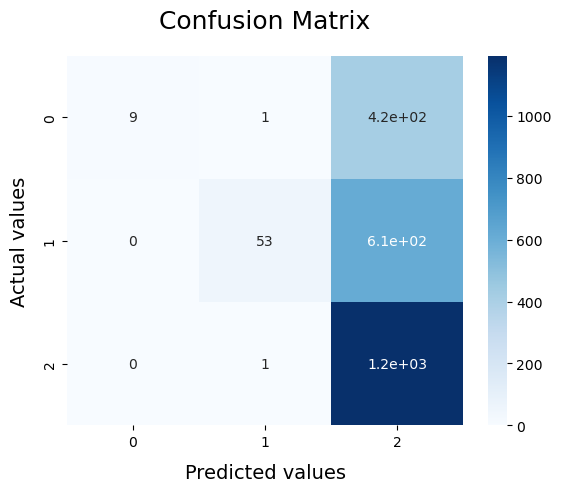

In [86]:
BNBmodel = BernoulliNB()
BNBmodel.fit(X_train, y_train)
model_Evaluate(BNBmodel)
y_pred1 = BNBmodel.predict(X_test_transformed)

## Model-2

#### SVM (Support Vector Machine)

              precision    recall  f1-score   support

          -1       0.68      0.46      0.55       429
           0       0.80      0.63      0.70       666
           1       0.74      0.92      0.82      1195

    accuracy                           0.75      2290
   macro avg       0.74      0.67      0.69      2290
weighted avg       0.75      0.75      0.74      2290



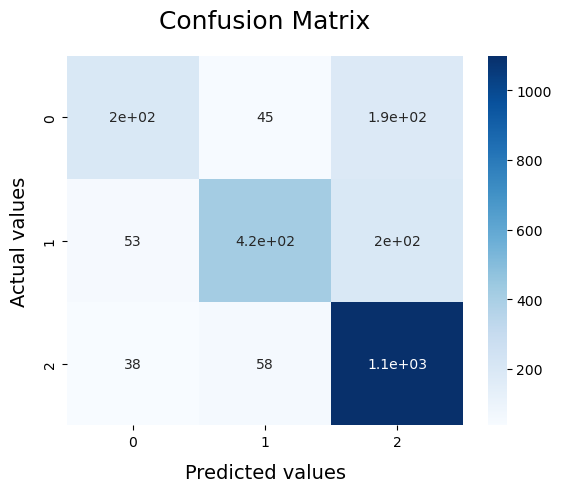

In [87]:
SVCmodel = LinearSVC()
SVCmodel.fit(X_train, y_train)
model_Evaluate(SVCmodel)
y_pred2 = SVCmodel.predict(X_test_transformed)

## Model-3

#### Logistic Regression

              precision    recall  f1-score   support

          -1       0.72      0.37      0.49       429
           0       0.82      0.52      0.63       666
           1       0.68      0.94      0.79      1195

    accuracy                           0.71      2290
   macro avg       0.74      0.61      0.64      2290
weighted avg       0.73      0.71      0.69      2290



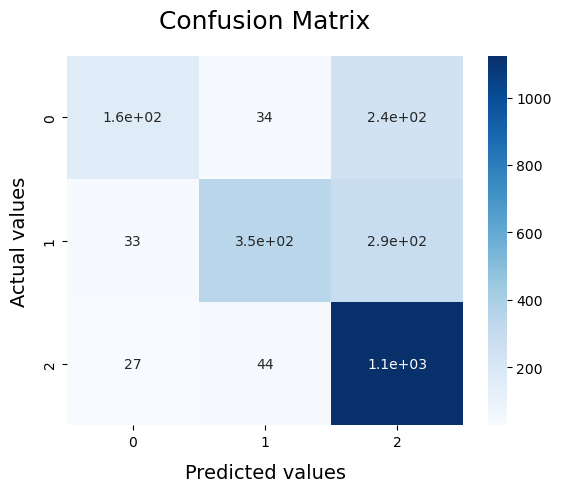

In [88]:
LRmodel = LogisticRegression(C = 2, max_iter = 1000, n_jobs=-1)
LRmodel.fit(X_train, y_train)
model_Evaluate(LRmodel)
y_pred3 = LRmodel.predict(X_test_transformed)

### Time Series

In [110]:
dataTimeSeries =pd.concat([dataAfter, dataBefore], ignore_index=True)
data =  pd.concat([dataTimeSeries["created_at"],dataModelling["Sentiment"] ], axis = 1)

In [111]:
data

created_at  Sentiment
0     2023-05-14 15:06:53+00:00          0
1     2023-05-14 15:06:50+00:00         -1
2     2023-05-14 15:06:46+00:00         -1
3     2023-05-14 15:06:28+00:00          1
4     2023-05-14 15:06:22+00:00          0
...                         ...        ...
7627  2023-05-13 18:29:42+00:00          0
7628  2023-05-13 18:29:41+00:00          0
7629  2023-05-13 18:29:38+00:00          1
7630  2023-05-13 18:29:38+00:00          1
7631  2023-05-13 18:29:35+00:00          1

[7632 rows x 2 columns]

In [112]:
# Zaman Formatına Dönüştür.
data['created_at'] = pd.to_datetime(data['created_at'])

In [113]:
# Zamanları Sıralama (yıl, ay, gün)
data.sort_values(by='created_at', inplace=True)

In [114]:
data

created_at  Sentiment
4631 2023-05-11 20:29:07+00:00          0
4630 2023-05-11 20:29:07+00:00          1
4629 2023-05-11 20:29:08+00:00         -1
4628 2023-05-11 20:29:09+00:00          1
4627 2023-05-11 20:29:09+00:00          1
...                        ...        ...
2636 2023-05-16 13:30:01+00:00          0
2635 2023-05-16 13:30:29+00:00         -1
2634 2023-05-16 13:30:35+00:00          0
2633 2023-05-16 13:32:55+00:00          1
2632 2023-05-16 13:34:41+00:00         -1

[7632 rows x 2 columns]

In [115]:
# Zaman Verisini İndex Yap
data.set_index('created_at', inplace=True)


In [120]:
# Bütün Günleri Birleştirdim
data = data.resample('D').mean()

In [128]:
# Hangi Model Daha İyi test Ettik

from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX

# ARIMA Model
model_arima = ARIMA(data['Sentiment'], order=(1, 1, 1)).fit()

# SARIMA Model
model_sarima = SARIMAX(data['Sentiment'], order=(1, 1, 1), seasonal_order=(1, 1, 1, 12)).fit()

# 5.6 Get AIC Score
aic_arima = model_arima.aic
aic_sarima = model_sarima.aic

# Best Model (Lower AIC Score)
best_model = min(aic_arima, aic_sarima)

if best_model == aic_arima:
    print("Best model: ARIMA")
elif best_model == aic_sarima:
    print("Best model: SARIMA")


Best model: ARIMA


C:\Users\ernsb\.conda\envs\AI\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning:

Non-invertible starting MA parameters found. Using zeros as starting parameters.

C:\Users\ernsb\.conda\envs\AI\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

C:\Users\ernsb\.conda\envs\AI\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning:

Too few observations to estimate starting parameters for ARMA and trend. All parameters except for variances will be set to zeros.

C:\Users\ernsb\.conda\envs\AI\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning:

Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.



In [131]:
from statsmodels.tsa.stattools import adfuller

def adf_test(timeseries):
    result = adfuller(timeseries)
    print('ADF Test Statistic:', result[0])
    print('P-Value:', result[1])
    print('Lags Used:', result[2])
    print('Number of Data Observed:', result[3])
    print('Number of Elements:', len(result[4]))
    print('Critical Values:')
    for key, value in result[4].items():
        print('\t%s: %.3f' % (key, value))

adf_test(data['Sentiment'])

# Since the #p value is 0.35, the null hypothesis cannot be rejected. This means that the data is not stationary.
# We need to make the data static

ADF Test Statistic: -1.8636267322862996
P-Value: 0.34936085223553137
Lags Used: 1
Number of Data Observed: 4
Number of Elements: 3
Critical Values:
	1%: -7.355
	5%: -4.474
	10%: -3.127


In [132]:
# Duraganlık Test Et
data = data.diff().dropna()
data = data.diff().dropna()
print(data.head())

                           Sentiment
created_at                          
2023-05-13 00:00:00+00:00   0.004000
2023-05-14 00:00:00+00:00  -0.110027
2023-05-15 00:00:00+00:00   0.052183
2023-05-16 00:00:00+00:00  -0.015952


In [146]:
# Let's create our ARIMA modelmodel = ARIMA(date_polarity, order=(1, 1, 1))
from statsmodels.tsa.arima.model import ARIMA

model = ARIMA(data, order=(1, 1, 1))
model_fit = model.fit()

# Let's take a look at the model summary
print(model_fit.summary())


                               SARIMAX Results                                
Dep. Variable:              Sentiment   No. Observations:                    4
Model:                 ARIMA(1, 1, 1)   Log Likelihood                   3.361
Date:                Mon, 22 May 2023   AIC                             -0.723
Time:                        02:57:12   BIC                             -3.427
Sample:                    05-13-2023   HQIC                            -6.158
                         - 05-16-2023                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.3863      4.895     -0.079      0.937      -9.980       9.207
ma.L1         -0.9365    140.701     -0.007      0.995    -276.705     274.832
sigma2         0.0033      0.441      0.008      0.9

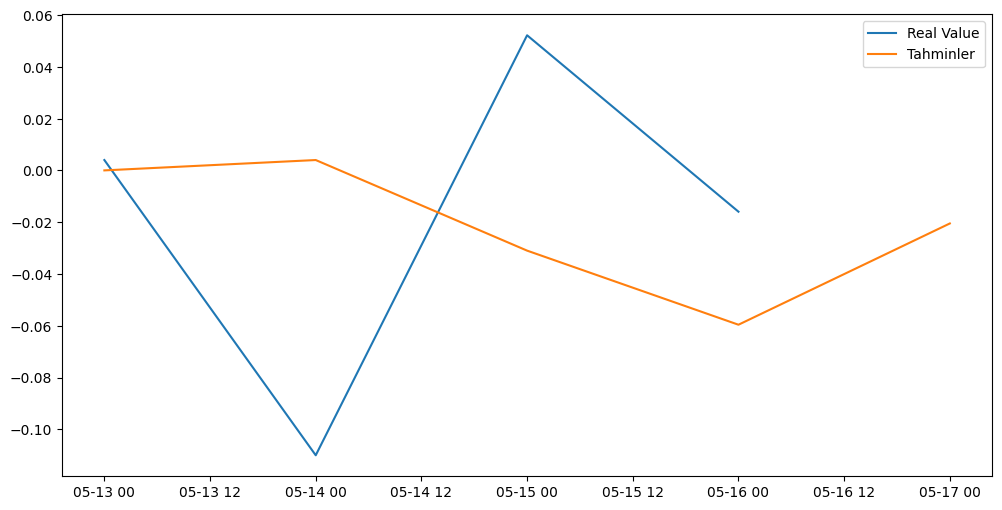

In [139]:
# Make predictions of our model
predictions = model_fit.predict(start=0, end=len(data), typ='levels')

# Compare our predictions with real values
plt.figure(figsize=(12,6))
plt.plot(data ['Sentiment'], label='Real Value')
plt.plot(predictions, label='Tahminler')
plt.legend()
plt.show()

C:\Users\ernsb\AppData\Local\Temp\ipykernel_16776\3148898710.py:6: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




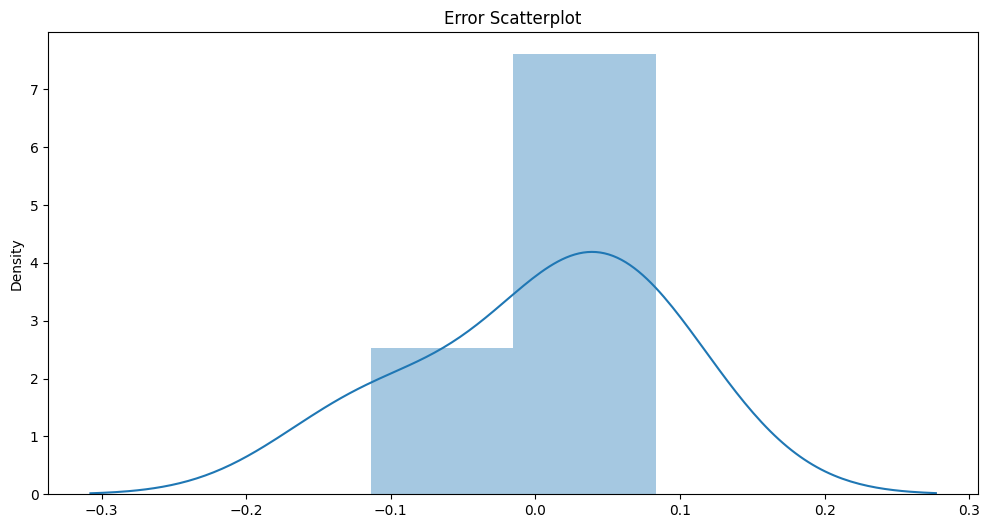

In [140]:
# Let's calculate the errors of our model
residuals = data['Sentiment'] - predictions

# Let's draw the error distribution graph
plt.figure(figsize=(12,6))
sns.distplot(residuals)
plt.title('Error Scatterplot')
plt.show()

In [142]:
# Export Dataset as CSV  Sonucları cıktı olarak kaydetmek istersen 
data.to_csv('date_polarity.csv', index=True)

In [145]:
# Model Optimizasyon

import pandas as pd
import numpy as np
import statsmodels.api as sm
import itertools
import warnings

# Creating possible combinations of parameters of the ARIMA model
p = range(0, 3)
d = range(0, 2)
q = range(0, 3)
pdq = list(itertools.product(p, d, q))

# Function that calculates the best parameter combination and AIC value
def best_params_aic(ts_data):
    best_params = pdq[0]
    best_aic = np.inf
    
    for param in pdq:
        try:
            mod = sm.tsa.ARIMA(ts_data, order=param)
            results = mod.fit()
            aic = results.aic
            if aic < best_aic:
                best_aic = aic
                best_params = param
        except:
            continue
            
    return best_params, best_aic

# Loading the dataset and finding the best parameters with the Grid Search method
warnings.filterwarnings("ignore")
data = pd.read_csv('date_polarity.csv', parse_dates=['created_at'], index_col='created_at')
start_date = data.index.min()
end_date = data.index.max()
data = data.loc[start_date:end_date]

# Extracting the 'Polarity' column from the dataset
polarity_data = data['Sentiment']

# Splitting the data into training and testing sets
train_data = polarity_data.loc[start_date:end_date - pd.DateOffset(days=1)]
test_data = polarity_data.loc[end_date:end_date]

best_params, best_aic = best_params_aic(train_data)

# Building and testing the model with the best parameters
model = sm.tsa.ARIMA(train_data, order=best_params)
results = model.fit()
forecast = results.get_forecast(steps=1)  # Tahmin edilecek adım sayısı 1 olarak düzeltilmiştir

# Extracting the forecasted values and confidence intervals
forecasted_values = forecast.predicted_mean
confidence_intervals = forecast.conf_int()

# Printing the forecasted values and confidence intervals
print("Forecasted Values:")
print(forecasted_values)
print("\nConfidence Intervals:")
print(confidence_intervals)


Forecasted Values:
2023-05-16 00:00:00+00:00   -0.158055
Freq: D, dtype: float64

Confidence Intervals:
                           lower Sentiment  upper Sentiment
2023-05-16 00:00:00+00:00        -0.158338        -0.157772
